<a href="https://colab.research.google.com/github/nicolasero87/SongAttributes_1999-2019_Spotify_Nicolas_Roman/blob/main/31%20.%20Spotify%20Songs%20Atributes_Nicolas_Rom%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final
#**Fundamento Ciencias de datos I**

---


###Alumno: Nicolas Román
####Comision 61600

###Prof.: Daniela Blanco
###Tutor: Edgardo Lucero



#####Data Base: "songAttributes_1999-2019.csv"

#####Septiembre 2024


# CONSIGNA
Identificar 1 dataset potencial con las siguientes características:
 i) al menos 2000 filas,
 ii) al menos 15 columnas.
Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.
Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
Identificar valores perdidos.
ormato

Entregar un archivo con formato .ipynb. Debe tener el nombre “ProyectoDS_ParteI_+Apellido.ipynb”



####Importacion de librerias y conexion a la carpeta de GitHub

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

In [2]:
! git clone https://github.com/nicolasero87/PPL_ALTAS.git

Cloning into 'PPL_ALTAS'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 125 (delta 72), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (125/125), 36.73 MiB | 7.68 MiB/s, done.
Resolving deltas: 100% (72/72), done.


# DATA SET: "ATRIBUTOS DE CANCIONES DE SPOTIFY" (*Spotify Song Attributes*)
#Abstracto
documento: songAttributes_1999-2019.xlsx**. El mismo fue importado tambien en formato *.csv

Spotify Song Attributes

El data set elegido se trata de un conjunto de datos (instancias) de 2017 canciones con atributos de la API de Spotify.
Cada fila representa una canción.
Hay 16 columnas:

13 columnas son atributos de la canción,
una columna para el nombre de la canción,
una para el artista,
y también tiene una columna llamada ‘LABEL’ que determina si al creador de la base de datos le gusta (1) o no le gusta (0) la canción.

Aquí están los 13 atributos de las canciones:

acousticness (acústica)
danceability (bailabilidad)
duration_ms (duración en milisegundos)
energy (energía)
instrumentalness (instrumentalidad)
key (clave/registro)
liveness (vivacidad)
loudness (sonoridad)
mode (modo)
speechiness (hablabilidad)
tempo (tempo)
time_signature (compás)
valence (valencia)

variables potencialmente interesantes:
1. artistas más repetidos en el archivo
2. qué clase de canciones prefiere el autor del data set
3. canciones más bailables y energáticas de la base de datos


# OBJETIVOS

El presente proyecto tiene 2 objetivos:

1.  **Objetivo n° 1**: Analizar el perfil de gusto musical del autor de la base de Datos. (primera parte del notebook)

2.   **Objetivo n° 2**: Intentar crear un algoritmo que prediga qué canciones le gustarán al autor del data set. (segunda parte del notebook)

In [3]:
#leo el data set
df_2 = pd.read_csv('/content/PPL_ALTAS/songAttributes_1999-2019.csv')

In [4]:
#impresion de las primeras 5 filas del data set
df_2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
#tamaño del data set para saber si cumple con los requisitos exigidos ( al menos 2000 filas y al menos 15 columnas.)
df_2.shape
print("El dataset 'songAttributes_1999-2019.csv' cumple con los requisitos exigidos.")

El dataset 'songAttributes_1999-2019.csv' cumple con los requisitos exigidos.


In [6]:
#metodo para describir las variables del data set y redondear los valores decimales a 2 cifras
df_2.describe().round(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.0,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00
mean,1008.0,0.19,0.62,246306.20,0.68,0.13,5.34,0.19,-7.09,0.61,0.09,121.60,3.97,0.50,0.51
std,582.4,0.26,0.16,81981.81,0.21,0.27,3.65,0.16,3.76,0.49,0.09,26.69,0.26,0.25,0.50
min,0.0,0.00,0.12,16042.00,0.01,0.00,0.00,0.02,-33.10,0.00,0.02,47.86,1.00,0.03,0.00
25%,504.0,0.01,0.51,200015.00,0.56,0.00,2.00,0.09,-8.39,0.00,0.04,100.19,4.00,0.30,0.00
50%,1008.0,0.06,0.63,229261.00,0.72,0.00,6.00,0.13,-6.25,1.00,0.05,121.43,4.00,0.49,1.00
75%,1512.0,0.26,0.74,270333.00,0.85,0.05,9.00,0.25,-4.75,1.00,0.11,137.85,4.00,0.69,1.00
max,2016.0,1.00,0.98,1004627.00,1.00,0.98,11.00,0.97,-0.31,1.00,0.82,219.33,5.00,0.99,1.00


A partir de esta descripción de las variables que componen el data set 'songAttributes_1999-2019.csv', podríamos ver algunas caracteristicas salientes: por ejemplo los ALTOS valores en promedio de Danceability (bailable) y Energy (energía) en contraposicion a los BAJOS valores de acústica (Acousticness) y e instrumentalidad (instrumentalness). ¿será que el autor del data set prefiere canciones más divertidas y bailables por sobre las melódicas y acústicas?

In [7]:
df_2.describe(include='object')

,song_title,artist
count,2017,2017
unique,1956,1343
top,River,Drake
freq,3,16


La descripción anterior nos anticipa que Drake es el artista más repetido del data set.

In [8]:
#Identificar valores perdidos.
df_2.isnull().sum()

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


El resultado anterior es muy importante porque nos dice que no hay valores nulos. Es decir que no hay datos faltantes.

# OBJETIVO n° 1

  

> Se busca analizar el perfil de gusto musical del autor de la base de DATOS



##### Preguntas preliminares relativas al data set teniendo en cuenta el objetivo n°1:
interrogantes que surgen de la base de datos:
####1.¿hay algún artista que sobresalga de los restantes?
####2.¿qué clase de musica es la preferida para el autor de la base de datos, considerando las caracteristicas descriptas para cada canción?

##Planteo para el Objetivo n° 1
Usaremos gráficos y visualizaciones para explorar y analizar el conjunto de datos del data set Spotify Song Attributes.

El objetivo es explorarlos, investigarlos y aprender usando distintos métodos.

Se busca analizar el perfil de gusto musical del autor de la base de datos.

#Contexto analitíco
Explorar el data set Spotify Song Attributes mediante la aplicacion de métodos y visualización a traves de distintas clases de gráficos que orienten el análisis y permitan la obtención de valiosos insights.

##EDA EXPLORATORY DATA ANALYSIS (ETA)

1. Atributos distinguidos (Artistas más mencionados, Top 5)
2. Análisis Univariados (características de las canciones del artista más mencionado y de la variable tiempo)
3. Analisis Bi/Multi Variados (relacion entre las variables tiempo con 'danceability' y 'energy')
4. Detectar valores aberrantes y datos perdidos
5. Detectar valores outliers

In [9]:
#cuáles son los artistas ordenandolos por cantidad de veces mencionados
artist_counts = df_2['artist'].value_counts()
artist_counts_sorted = artist_counts.sort_values(ascending=False)
print(artist_counts_sorted)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
                   ..
Stan Getz           1
Ray Bryant          1
Duke Ellington      1
John Mayer          1
Bleachers           1
Name: count, Length: 1343, dtype: int64


In [10]:
#serie con los primeros 5 artistas
top_5_artists_series = artist_counts_sorted.head(5)
print(top_5_artists_series)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: count, dtype: int64


Este método nos resume cuáles son los artistas Top 5 de la base de datos bajo análisis.

Text(-0.3, 26, 'Cantidad de Canciones')

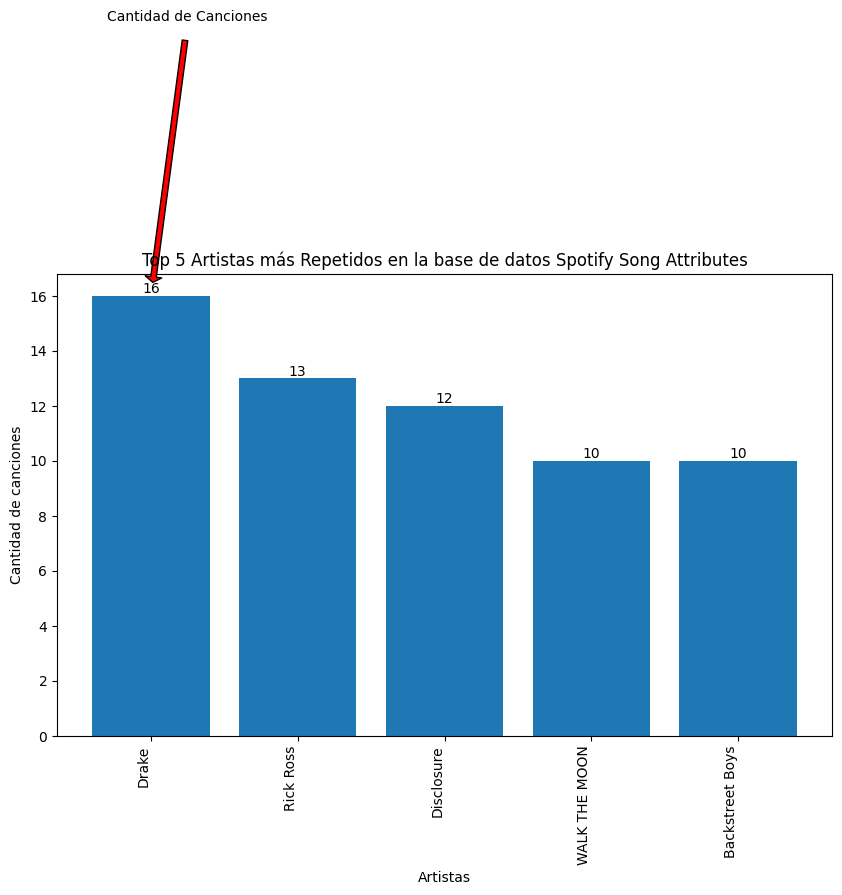

In [11]:
# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(artistas, conteos)
plt.xlabel('Artistas')
plt.ylabel('Cantidad de canciones')
plt.title('Top 5 Artistas más Repetidos en la base de datos Spotify Song Attributes')
for i, v in enumerate(conteos):
    plt.text(i, v, str(v), ha='center', va='bottom') #etiquetas con los valores
plt.xticks(rotation=90, ha='right')
x = 1
y = 2
x_offset = 0.5
y_offset = 0.5

# ubicar el indice de la  barra mas alta
highest_bar_index = conteos.argmax()

# ubicar la coordenada x de la  barra mas alta
x = highest_bar_index

# ubicar la coordenada y de la  barra mas alta
y = conteos[highest_bar_index]

# ajustar el ancho
x_offset = -0.3
y_offset = 10

plt.annotate('Cantidad de Canciones', xy=(x, y), xytext=(x + x_offset, y + y_offset),
             arrowprops=dict(facecolor='red', shrink=0.05, headlength=4)) # Adjust headlength as needed

Este gráfico es útil para comunicar de manera clara y concisa la frecuencia de los 5 artistas más repetidos en la base de datos "Spotify Song Attributes" y destacar al artista principal.
Con la flecha roja se apunta el valor de las canciones del artista más mencionado en el data set. (16 canciones).
Veamos ahora cómo es la proporcion entre los cinco artitas más mencionados en el data set para compararlos entre sí.



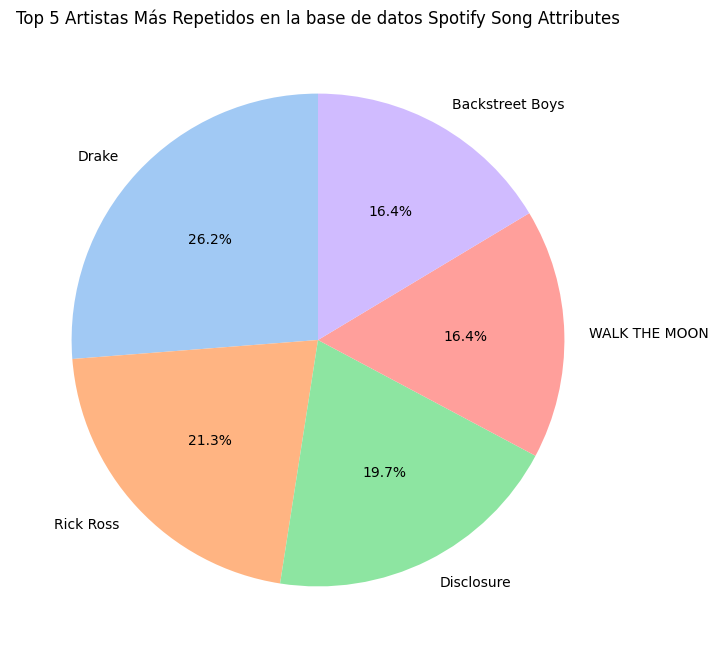

In [12]:
#ver la proporcion entre los 5 artistas mas mencionados en un grafico de torta usando Seaborn

# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

#  gráfico de torta
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(conteos, labels=artistas, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Artistas Más Repetidos en la base de datos Spotify Song Attributes')
plt.show()

Si bien se advierte que el artista Drake es el principal del top 5, los 4 restantes no se encuentran sustancialmente muy alejados del primero. Es una distribucion bastante proporcional.

##Analizaremos al artista 'preferido' del autor del data set, poniendo el foco en las canciones de 'Drake'.

In [13]:
#cuáles son las canciones del artista mas mencionado
canciones_drake = df_2[df_2['artist'] == 'Drake']['song_title']
print(canciones_drake)

5                        Sneakin’
6                     Childs Play
37                        Jumpman
117                 Hotline Bling
154                     Big Rings
158                 Know Yourself
168               Wu-Tang Forever
440                     Headlines
589       Started From the Bottom
676     Hold On, We're Going Home
717     Hold On, We're Going Home
779       0 To 100 / The Catch Up
1016             Skepta Interlude
1183                 Passionfruit
1218              Best I Ever Had
1223                    Take Care
Name: song_title, dtype: object


Ahora analicemos de tales canciones dónde se concentran los valores de las mismas dentro de la categoria 'danceability':

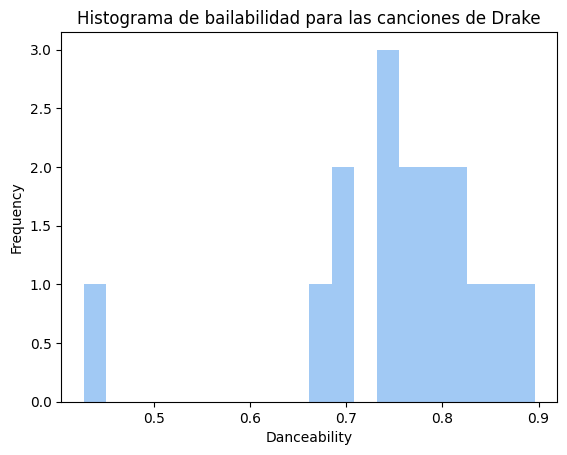

In [14]:
drake_danceability_df = df_2[df_2['artist'] == 'Drake'][['danceability']]
#print(drake_danceability_df)

plt.hist(drake_danceability_df['danceability'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Histograma de bailabilidad para las canciones de Drake')
plt.show()

Analizando el histograma de Danceability ´bailabilidad´ de las canciones de Drake se observa  una concentración de valores altos (hacia la derecha del gráfico), de modo que el insigh obtenido es que las canciones del artista Drake (de este data set) tienden a poseer un alto grado de bailabilidad.

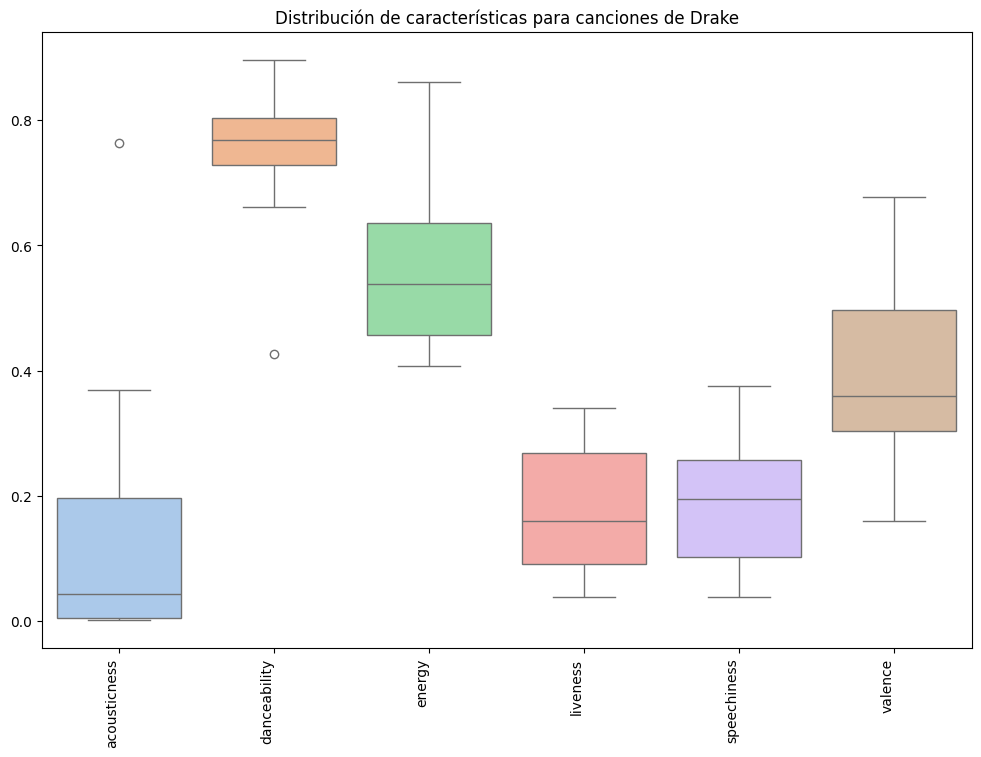

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Canciones de Drake
drake_songs = df_2[df_2['artist'] == 'Drake']

# Columnas deseadas para el gráfico
columnas_deseadas_grafico = ['acousticness', 'danceability', 'energy',
                     'liveness',   'speechiness',   'valence']

# Convierte la lista de Series en un DataFrame, seleccionando solo las columnas deseadas
drake_df = pd.DataFrame(drake_songs)[columnas_deseadas_grafico]

# Crea el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=drake_df)
plt.xticks(rotation=90, ha='right')
plt.title('Distribución de características para canciones de Drake')
plt.show()

Insights:
al comparar la distribución de las diferentes características se observa que la principal caracteristica de las canciones de Drake es que son bailables (mediana mas alta y rango pequeño) y en segundo lugar canciones energeticas (mediana alta).
No hay canciones representadas por puntos fuera de los bigotes que permitan Identificar canciones atípicas.
La dispersión de los datos en cada caja  da una idea de la variabilidad en cada característica del estilo musical de Drake. La caractiristica con valores mas bajos es 'acustico'.
En este gráfico de cajas se observa la concordancia con la caracteristica 'bailable'(es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos).

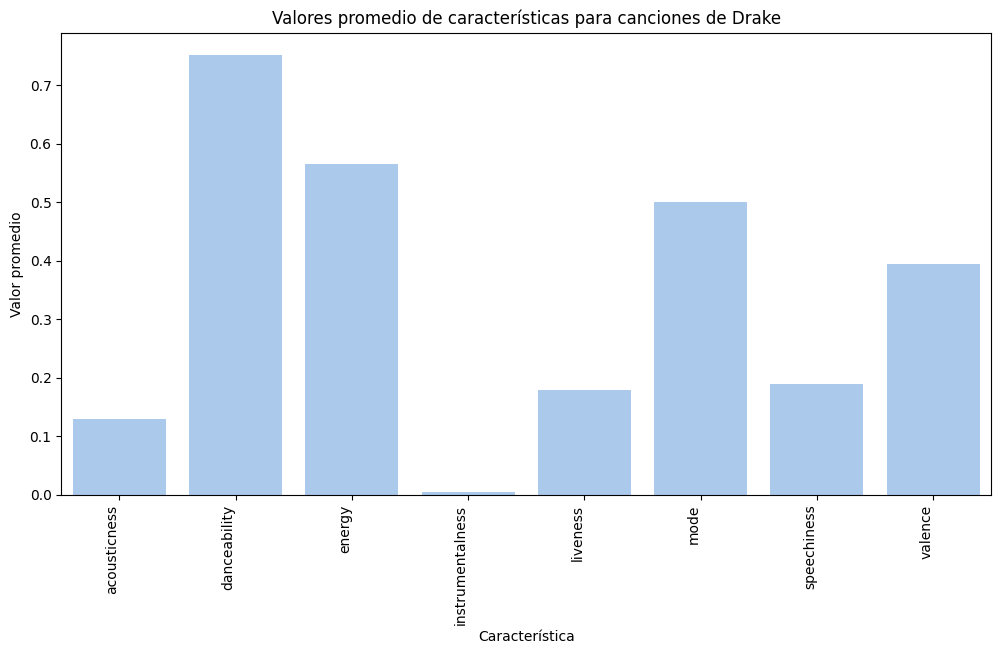

In [16]:
#distribucion de las caracteristicas de las canciones del artista mas mencionado
drake_songs = df_2[df_2['artist'] == 'Drake']
import seaborn as sns
import matplotlib.pyplot as plt

columnas_deseadas = ['acousticness', 'danceability',  'energy', 'instrumentalness',
                     'liveness',  'mode', 'speechiness',   'valence']

# Calcula el promedio de cada característica
promedios_drake = drake_songs[columnas_deseadas].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=promedios_drake.index, y=promedios_drake.values)
plt.xticks(rotation=90, ha='right')
plt.title('Valores promedio de características para canciones de Drake')
plt.ylabel('Valor promedio')
plt.xlabel('Característica')

plt.show()

en este grafico de barras (con los promedios de los valores de cada caracteristica) se puede interpretar conjuntamente con los dos graficos anteriores ( de histograma y el de barras). Con las tres clases de gráficos se infiere que la caracteristica 'bailable', es donde más se concentran los valores y donde se observan los valores mas altos y menos dispersos.

Ahora analizaremos las 16 canciones de Drake de acuerdo a las caracteristicas de 'acousticness', 'danceability', 'energy', 'liveness', y 'speechiness' usando grafico de radar.

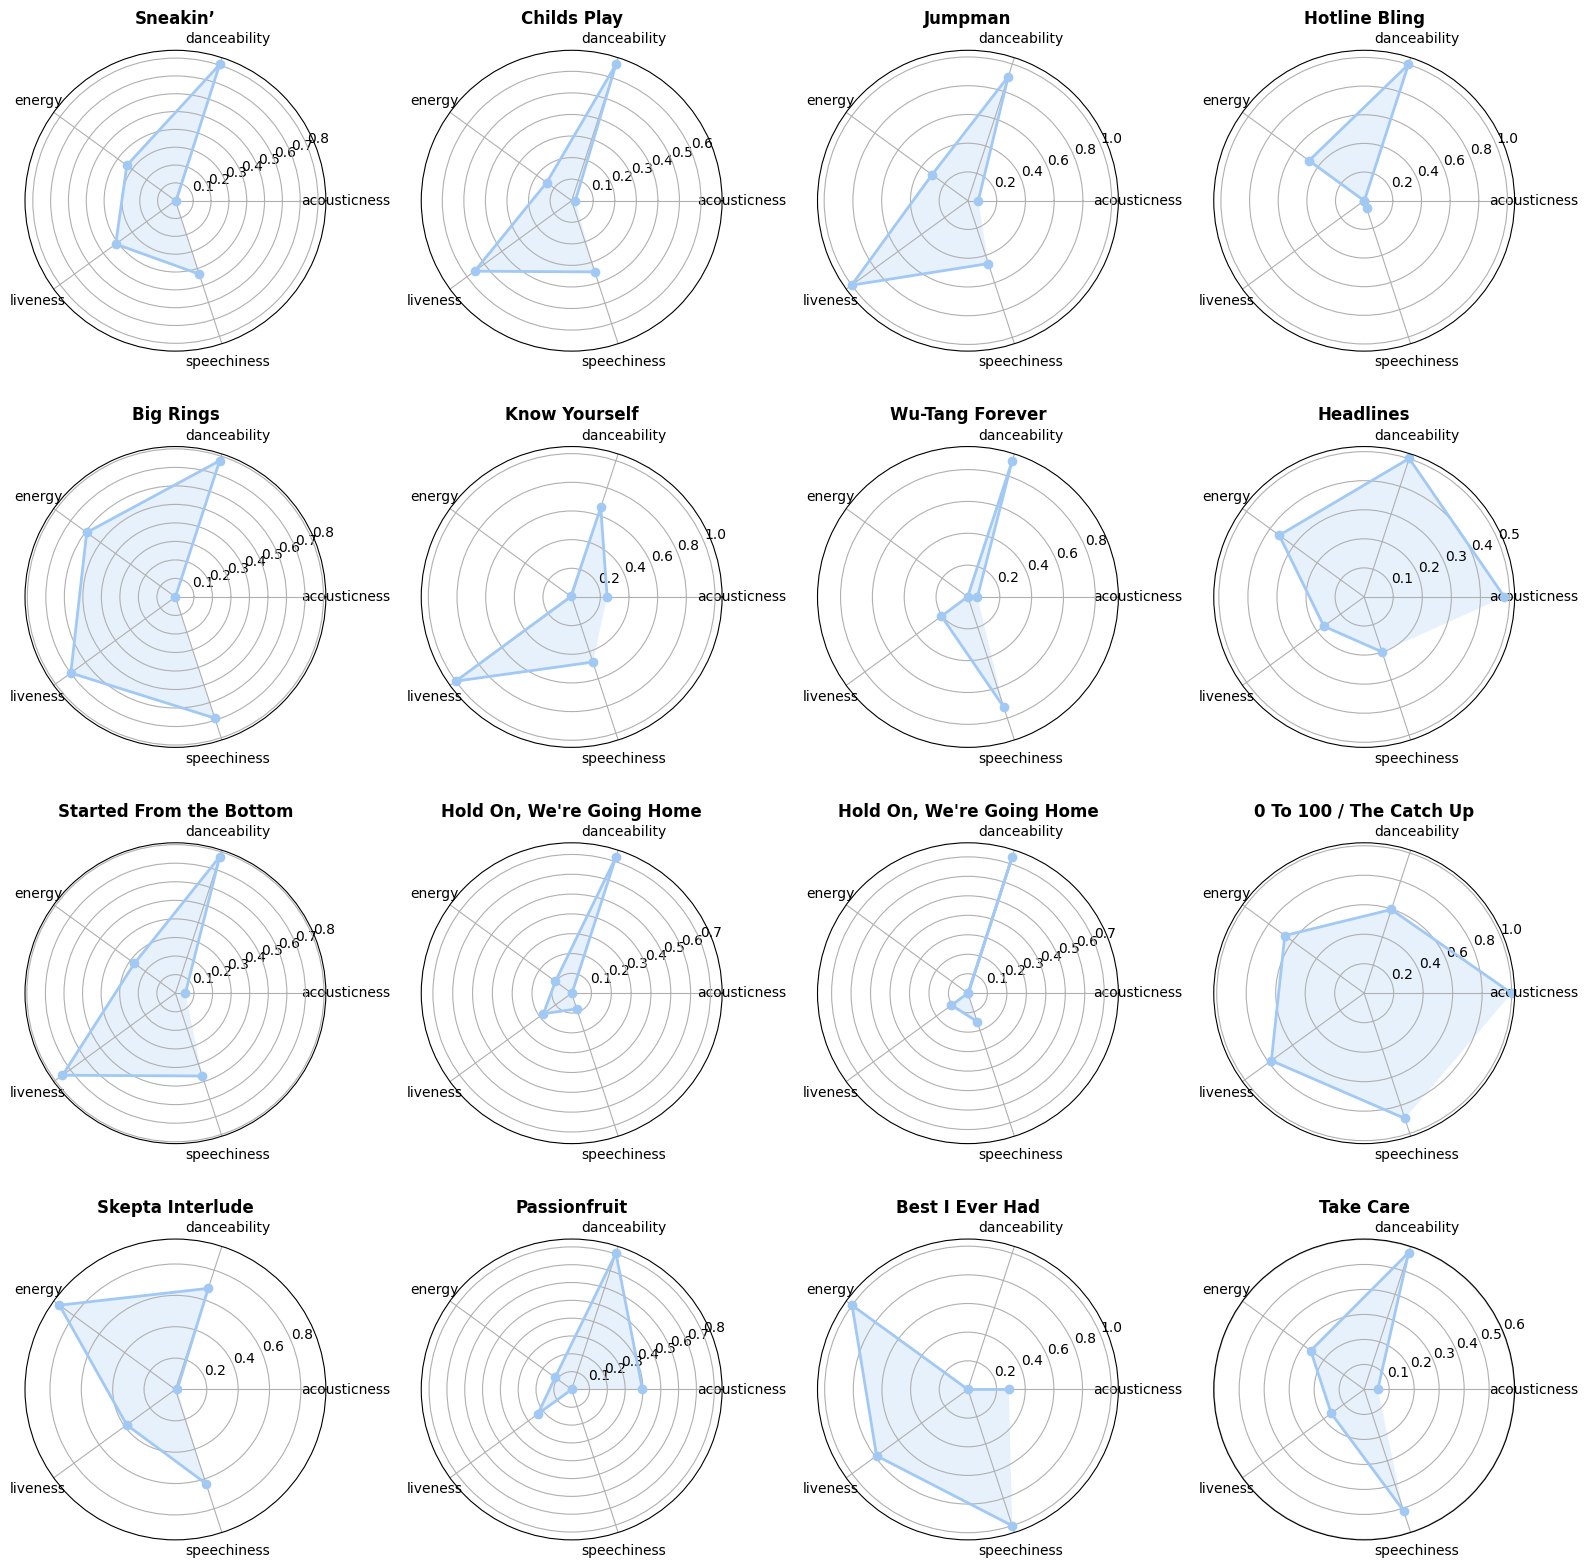

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Extrae los valores de las características para las canciones de Drake
drake_data = df_2[df_2['artist'] == 'Drake'][columnas_deseadas]

# Normaliza los valores entre 0 y 1
drake_data_norm = (drake_data - drake_data.min()) / (drake_data.max() - drake_data.min())

# Crea los ángulos para el gráfico de araña
angulos = np.linspace(0, 2*np.pi, len(columnas_deseadas), endpoint=False)
angulos = np.concatenate((angulos, [angulos[0]]))  # Cierra el círculo

# Crea una cuadrícula de subplots (4 filas x 4 columnas)
fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw=dict(polar=True))

# Itera sobre las canciones y crea los gráficos de radar
for i in range(len(drake_data_norm)):
    valores_cancion = drake_data_norm.iloc[i].values.tolist()
    valores_cancion += valores_cancion[:1]  # Cierra el círculo para cada canción

    # Obtén el título de la canción usando el índice
    titulo_cancion = df_2[df_2['artist'] == 'Drake']['song_title'].iloc[i]

    # Calcula la posición del subplot en la cuadrícula
    fila = i // 4
    columna = i % 4

    # Crea el gráfico de radar en el subplot correspondiente
    ax = axes[fila, columna]
    ax.plot(angulos[:-1], valores_cancion[:-1], 'o-', linewidth=2)
    ax.fill(angulos[:-1], valores_cancion[:-1], alpha=0.25)
    ax.set_thetagrids(angulos[:-1] * 180/np.pi, columnas_deseadas)
    ax.set_title(f'{titulo_cancion}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Al visualizar los 16 gráficos de radar de cada canción del artista Drake, se puede obtener informacion sobre la variabilidad de su estilo musical ya que los gráficos tienen formas muy diferentes entre sí.

Esto podría indicar que Drake experimenta con diferentes estilos musicales en sus canciones y donde la unica variable predominante  es 'bailable' ('danceability').

Las características predominantes en su música: la mayoría de las canciones de Drake tienen alta energía y bailabilidad. Podria afirmarse que su música es generalmente enérgica y bailable.

Canciones atípicas: el gráfico que se destaca del resto por tener una forma o valor muy diferente es el de la cancion 'Best I ever had' (por ser la unica cancion 'no bailale'. Esta cancion podría representar experimento musical o desviacion de su estilo habitual.

Siguiendo el correlato con los analisis realizados mediante los graficos anteriores (de barra e histograma) la caracteristica más observada para las canciones de Drake es 'bailabilidad'.

Teniendo en cuenta que la variable 'bailable' se repite en los análisis efectuados, ahora desearia saber dónde se concentran los datos haciendo un histograma para la base de datos en estudio. ¿será que al autor de la base de datos le suelen gustar canciones bailables en general? ¿o eso sólo sucede con las canciones del grupo Drake -su grupo con mayor cantidad de canciones en la base de datos-?. Veamos:

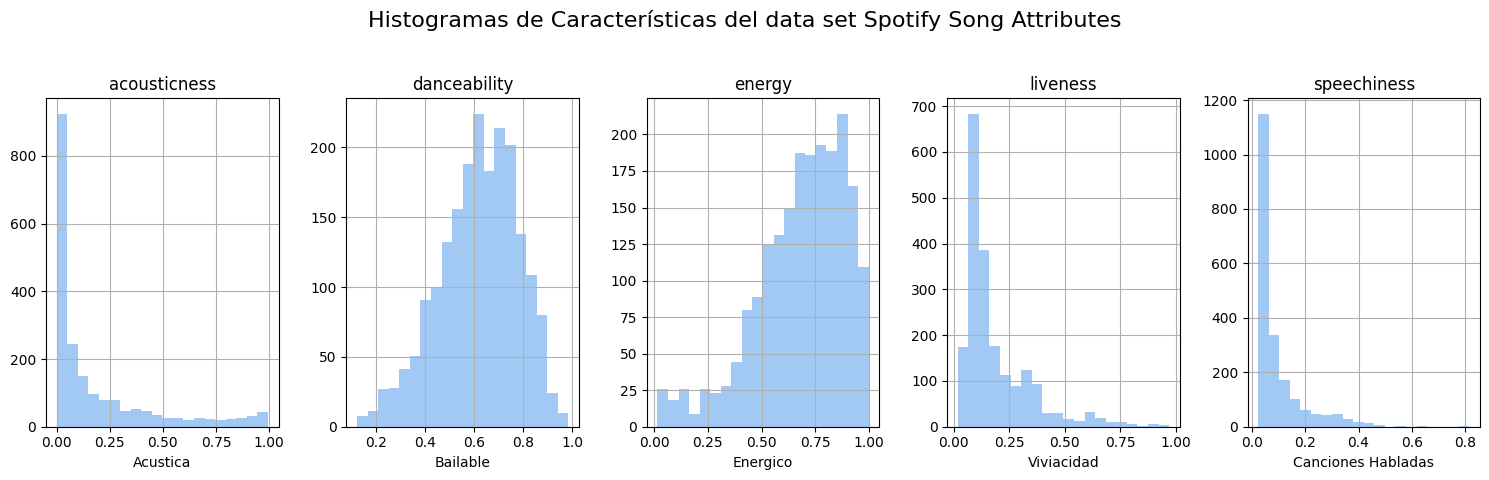

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccion de las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Creacion del histograma
fig, axes = plt.subplots(1, len(columnas_deseadas), figsize=(15, 5))  # Crea subplots individuales
df_2[columnas_deseadas].hist(ax=axes, bins=20)

# Nuevos títulos
nuevos_titulos = ['Acustica', 'Bailable', 'Energico', 'Viviacidad', 'Canciones Habladas']

# Reemplazo los títulos de los gráficos
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(nuevos_titulos[i])

plt.suptitle('Histogramas de Características del data set Spotify Song Attributes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Se puede inferir que, lo que sucede con las canciones de Drake tambien se replica para la mayoria de las canciones de la base de datos. Es decir que el autor de este data set tiende a preferir canciones bailables y enérgicas, con bajos valores para canciones acústicas, y habladas.

Veamos ahora si esto mismo sucede respecto de los 5 artistas más repetidos en la base de datos, que ya habiamos obtenido más arriba: artistas_top_5 = ['Drake', 'Rick Ross', 'Disclosure', 'Walk the Moon', 'Backstreet Boys']


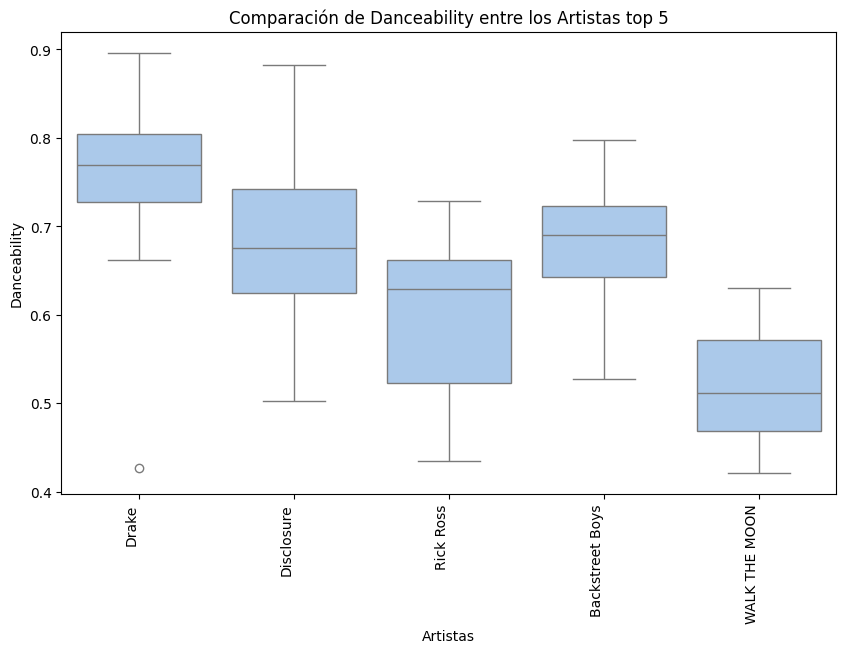

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Artistas más repetidos (top 5)
artistas_top = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas_top)]

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='artist', y='danceability', data=df_filtrado)
plt.xticks(rotation=90, ha='right')
plt.title('Comparación de Danceability entre los Artistas top 5')
plt.xlabel('Artistas')
plt.ylabel('Danceability')
plt.show()

Al comparar la mediana, los cuartiles y los valores atípicos de 'danceability' entre los artistas top 5, se observa variabilidad en el nivel de bailabilidad de sus canciones. Por lo tanto, si bien el autor tiene una tendencia hacia las canciones bailables considerando TODA la base de datos, cuando se focaliza en los 5 artitas más repetidos, la caracteristica bailable varia entre 0.8 (valor máximo para 'Drake') a 0,45 (valor mínimo: para 'Walk The Moon').

Veamos el detalle de 'danceability' y 'energy' en un grafico de barras agrupadas para los 5 artistas más repetidos. Esto  permite visualizar la cantidad de canciones, así como los valores promedio de 'danceability' y 'energy' para cada artista.



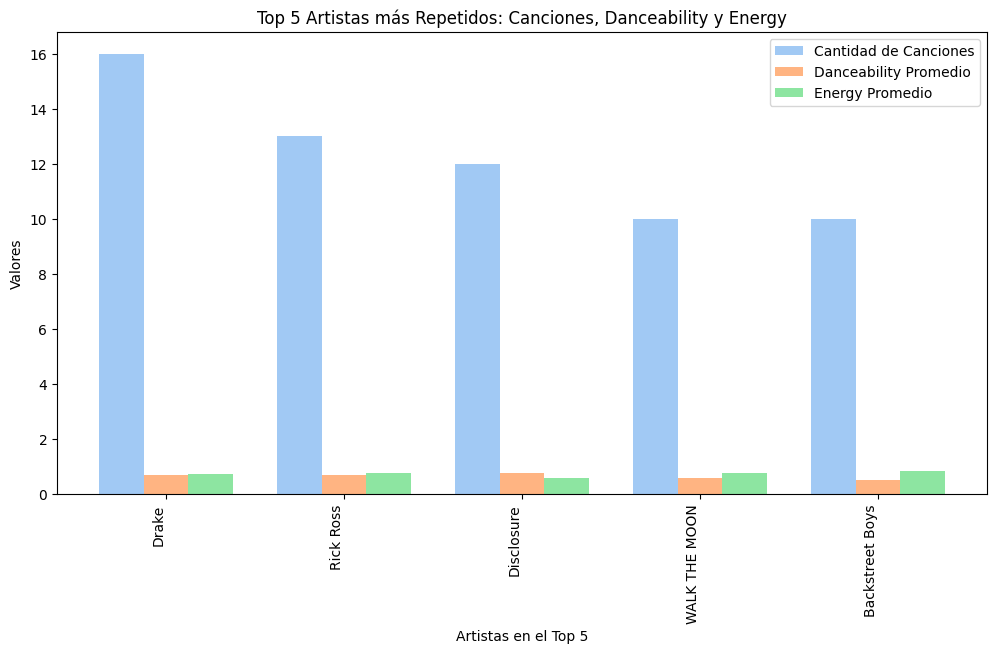

In [20]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones - ancho_barra, conteos, width=ancho_barra, label='Cantidad de Canciones')
ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: Canciones, Danceability y Energy')
ax.legend()

se advierte que el gráfico de barras agrupadas no es el mejor para evidenciar la diferencia apuntada en la conclusion anterior, (respecto a los valores promedio de 'danceability' y 'energy' para cada artista) ya que la columna de cantidad de canciones impide ver la variacion entre los artistas respecto de las variables bajo analisis. dicho en otras palabras, el gráfico NO  evidencia la conclusión anteriormente desarrollada. Intentemos hacer uno nuevo SIN la columna Cantidad de Canciones:

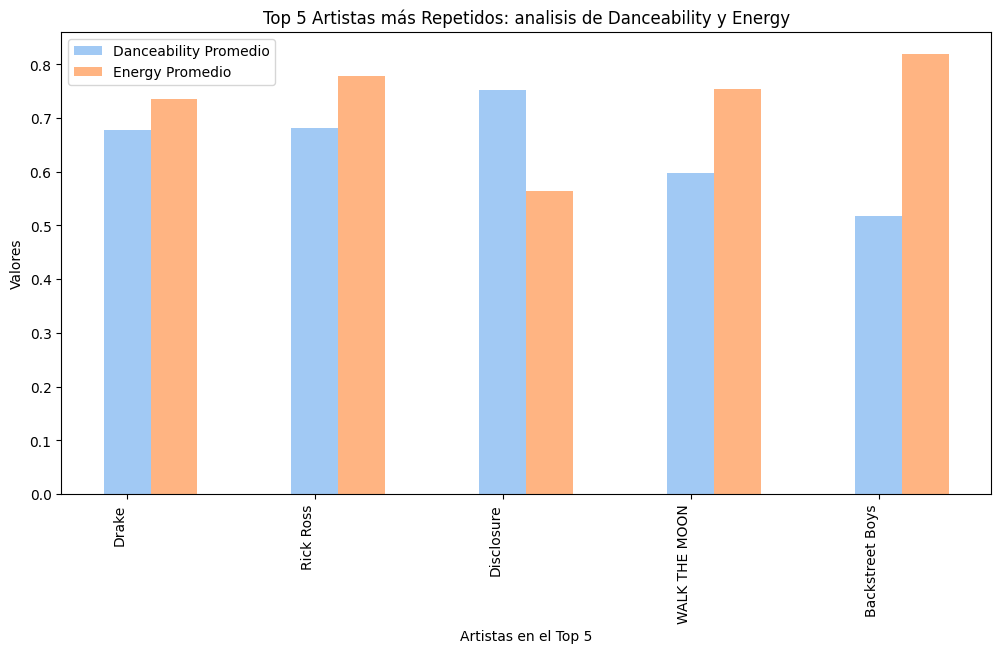

In [21]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: analisis de Danceability y Energy')
ax.legend()

Con el gráfico anterior se vuelve a evidenciar que los valores Danceability y Energy'(para el Top 5 de Artistas más Repetidos) son elevados y se muestra de mejor modo la diferencia de valores entre cada uno de ellos.


#### ¿Como influye la variable Duración ('duration_ms') en el data set respecto de la caracteristica 'danceability'?
Ya hemos analizado cuáles son los artitas favoritos del autor del data set y que la característica distintiva de la base de datos y del artista favorito tiende a ser 'dancecability'.
Indaguemos seguidamente si hay relación entre la variable 'danceability' y la duración de las canciones que posee el data set.
Primero analizaremos usando el método describe de la columna 'duration_ms', teniendo en cuenta que la duración de las canciones del data set están expresadas en milisegundos.

In [22]:
#repitamos el metodo describe
df_2.describe().round()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
mean,1008.0,0.0,1.0,246306.0,1.0,0.0,5.0,0.0,-7.0,1.0,0.0,122.0,4.0,0.0,1.0
std,582.0,0.0,0.0,81982.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,27.0,0.0,0.0,1.0
min,0.0,0.0,0.0,16042.0,0.0,0.0,0.0,0.0,-33.0,0.0,0.0,48.0,1.0,0.0,0.0
25%,504.0,0.0,1.0,200015.0,1.0,0.0,2.0,0.0,-8.0,0.0,0.0,100.0,4.0,0.0,0.0
50%,1008.0,0.0,1.0,229261.0,1.0,0.0,6.0,0.0,-6.0,1.0,0.0,121.0,4.0,0.0,1.0
75%,1512.0,0.0,1.0,270333.0,1.0,0.0,9.0,0.0,-5.0,1.0,0.0,138.0,4.0,1.0,1.0
max,2016.0,1.0,1.0,1004627.0,1.0,1.0,11.0,1.0,-0.0,1.0,1.0,219.0,5.0,1.0,1.0


In [23]:
#variable Duration_ms
df_2['duration_ms'] = df_2['duration_ms'].round(2)  # redondear a 2 decimales
descripcion_duracion = df_2['duration_ms'].describe(). round(2)
print(descripcion_duracion)

count       2017.00
mean      246306.20
std        81981.81
min        16042.00
25%       200015.00
50%       229261.00
75%       270333.00
max      1004627.00
Name: duration_ms, dtype: float64


El tiempo expresado en milisegundos debe ser convertido a minutos para poder ser comprendido:

In [24]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)  # Divide milisegundos (1000 * 60) para obtener minutos
descripcion_duracion = df_2['duration_min'].describe(). round(2)
print(descripcion_duracion)

count    2017.00
mean        4.11
std         1.37
min         0.27
25%         3.33
50%         3.82
75%         4.51
max        16.74
Name: duration_min, dtype: float64


Ahora vemos los datos más importantes del data set segun la duración en min:
la cancion más corta (0,27 min)
la cancion más extensa (16.74 min)
la duración promedio (4.11 min).
Vemos que la desviación estandar es de 1.37 minutos:
significa que aproximadamente el 68% de las canciones en el data set tienen duraciones dentro de 1.37 minutos por encima o por debajo de la duración promedio.
Alrededor del 95% de las canciones caen dentro de dos desviaciones estándar (2 * 1.37 = 2.74 minutos) de la media.
Casi todas (99.7%) de las canciones están dentro de tres desviaciones estándar (3 * 1.37 = 4.11 minutos) de la duración promedio.

In [25]:
# Encontrar el indice de la fila con la menor duración en minutos
index_min = df_2['duration_min'].idxmin()

# Encontrar el indice de la fila con la mayor duración en minutos
index_max = df_2['duration_min'].idxmax()

# obtener ahora el titulo de la canción, la duración y el artista correspondiente a tales índices
song_min = df_2.loc[index_min, 'song_title']
duration_min = df_2.loc[index_min, 'duration_min']
artist_min = df_2.loc[index_min, 'artist']

song_max = df_2.loc[index_max, 'song_title']
duration_max = df_2.loc[index_max, 'duration_min']
artist_max = df_2.loc[index_max, 'artist']


print(f"La canción con la menor duracion es: '{song_min}', interpretada por el artista: '{artist_min}' con una duración de {round(duration_min,2)} minutos)")

print(f"La canción con la mayor duracion es: '{song_max}', interpretada por el artista: '{artist_max}' con una duración de {round(duration_max,2)} minutos)")

La canción con la menor duracion es: 'Zac Brown Band - Hot Country', interpretada por el artista: 'Various Artists' con una duración de 0.27 minutos)
La canción con la mayor duracion es: 'The Nearness of You', interpretada por el artista: 'Joshua Redman' con una duración de 16.74 minutos)


Ya vimos cuál es la canción más extensa, la más corta, la duración promedio y algo acerca de la desviación estandar de la duración. Ahora podríamos representarlo en un histograma: ¿dónde se concentran la mayoría de las canciones de la base de datos dentro de 'duración'?(expresado ahora en Minutos y no en Milisegundos)

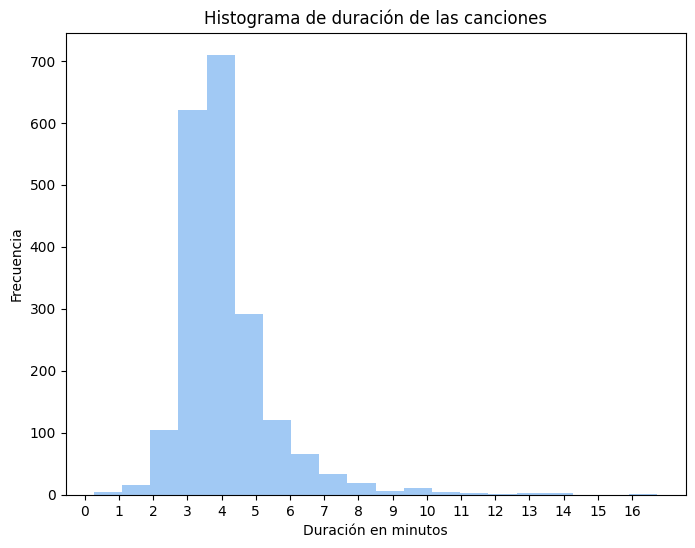

In [26]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_2['duration_min'], bins=20)
plt.xlabel('Duración en minutos')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración de las canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()


Promedio de duración de las canciones del data set:

In [27]:
promedio_duracion_minutos = df_2['duration_min'].mean()
promedio_redondeado = round(promedio_duracion_minutos, 2)
print('El promedio de las canciones del data set es de \033[1m\033[3;35m', promedio_redondeado, '\033[0m minutos.')

El promedio de las canciones del data set es de  4.11  minutos.


Vemos que el resultado del cálculo promedio es consecuente con el gráfico de histograma. Ahora veamos lo mismo pero mediante un gráafico de Cajas

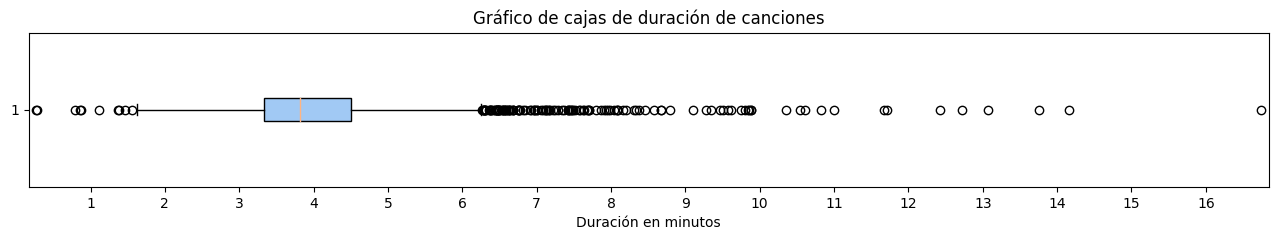

In [28]:
import matplotlib.pyplot as plt

# Calcular los límites del eje x
min_valor = df_2['duration_min'].min()
max_valor = df_2['duration_min'].max()

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['duration_min'], vert=False, patch_artist=True)
plt.xlabel('Duración en minutos')
plt.title('Gráfico de cajas de duración de canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)


# Ajustar los límites del eje x
plt.xlim(min_valor - 0.1, max_valor + 0.1)  # Ajusta los valores -0.5 y +0.5 según sea necesario

plt.show()


Con este gráfico de cajas de la duración de las canciones, se puede  analizar varios aspectos de la distribución de los datos del data set:

1. Mediana: La línea dentro de la caja representa la mediana, es decir, el valor que divide la distribución en dos mitades iguales. Demuestra dónde se encuentra la duración típica de las canciones en el dataset. (cercana a los 4 minutos)

2. Cuartiles: Los bordes de la caja representan el primer y tercer cuartil (Q1 y Q3). Estos valores dividen la distribución en cuatro partes iguales. La distancia entre Q1 y Q3 (el rango intercuartil)  indica la dispersión de la mitad central de los datos.

3. Rango: Las líneas que se extienden desde la caja (bigotes) muestran el rango de los datos, excluyendo posibles valores atípicos. Se puede observar la duración mínima y máxima de las canciones dentro de este rango.

4. Valores atípicos: Los puntos individuales fuera de los bigotes representan posibles valores atípicos, es decir, canciones con duraciones inusualmente largas o cortas en comparación con el resto de la distribución.

Veamos ahora cómo quedaria representado mediante el método de puntuación z el gráfico de cajas:

##Diagrama de caja de puntuaciones Z

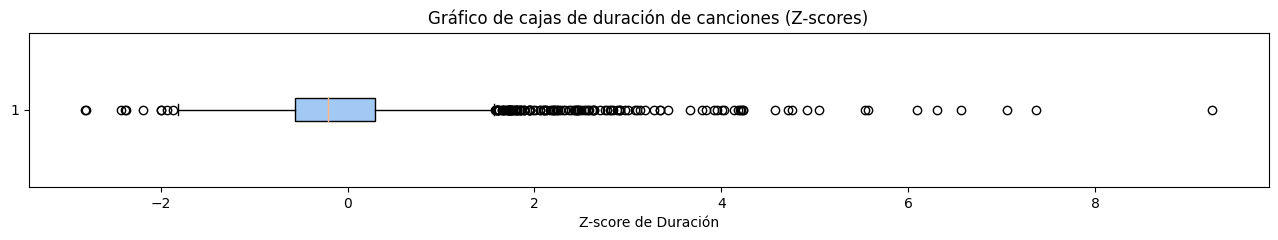

In [29]:
from scipy import stats
df_2['z_score_duration'] = stats.zscore(df_2['duration_min'])

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['z_score_duration'], vert=False, patch_artist=True)
plt.xlabel('Z-score de Duración')
plt.title('Gráfico de cajas de duración de canciones (Z-scores)')
plt.show()

Al calcular las puntuaciones z, se transforman los valores de 'duration_min' en una distribución normal estándar con una media de 0 y una desviación estándar de 1.

Esto permite identificar valores atípicos en función de cuántas desviaciones estándar están lejos de la media.

El diagrama de caja de puntuaciones z representa visualmente la distribución de estos valores estandarizados, lo que facilita la identificación de posibles valores atípicos. En este caso los que estan por debajo de -2 y los que se hallan mas alla de 4.

####Combinación de variables analizadas hasta ahora.
Ya analizamos en la primer parte las caracteristicas de las canciones y descubrimos la preponderancia de las características 'danceability' y 'energy'.

Seguidamente analizamos acerca de la duración de las canciones.

Ahora veamos cuál es la correlación entre tales variables entre sí representándolas mediante graficos de dispersión.

##Gráfico de dispersión: Duración y Danceability




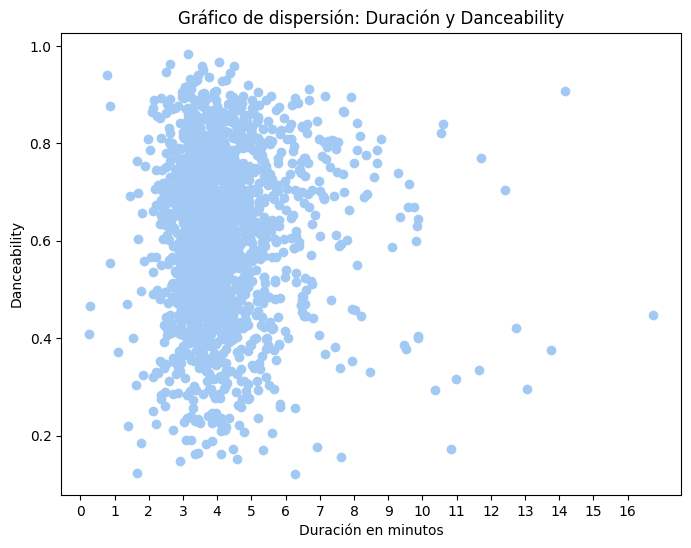

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['danceability'])
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos ahora como quedaria representado en un gráfico de dispersión de puntos respecto de la variable 'Energy'

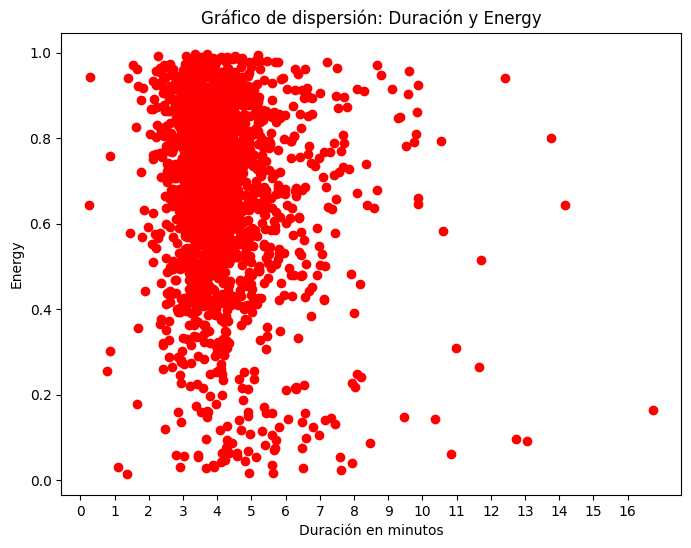

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['energy'], color='red')
plt.xlabel('Duración en minutos')
plt.ylabel('Energy')
plt.title('Gráfico de dispersión: Duración y Energy')

# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos las dos representaciones juntas usando subplots en Matplotlib. Lo que permitirá crear dos gráficos en una misma figura. Esto permite una comparación visual directa entre las dos relaciones.

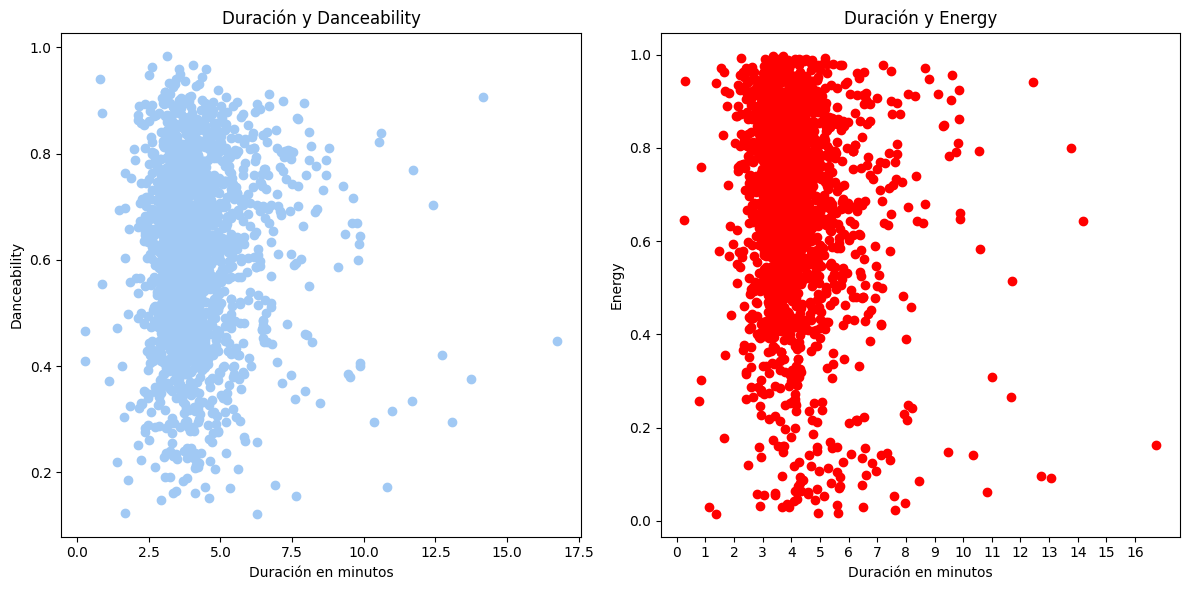

In [32]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Crea dos subplots en una fila

# Gráfico 1: Duración vs. Danceability
ax1.scatter(df_2['duration_min'], df_2['danceability'])
ax1.set_xlabel('Duración en minutos')
ax1.set_ylabel('Danceability')
ax1.set_title('Duración y Danceability')


# Aplica las marcas al eje x
plt.xticks(marcas_x)
# Gráfico 2: Duración vs. Energy
ax2.scatter(df_2['duration_min'], df_2['energy'], color='red')
ax2.set_xlabel('Duración en minutos')
ax2.set_ylabel('Energy')
ax2.set_title('Duración y Energy')

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

Insights:


*   Duración y Bailabilidad
Se observa una concentración de canciones bailables (de 0.5 a 0.8) con una duracion aprox. de 4 min.

*   Duración y Energía
Se observa una concentración de canciones energicas (de 0.6 a 10) con una duracion aprox. de 4 min.


Ahora veamos cuál es la influencia de la variable 'energy' en la variable 'danceability' dentro de un solo gráfico (donde la relación entre la duración y 'danceability' se representa mediante la posición de los puntos, y la variable 'energy' se mapea al color de los puntos).
Esto permite visualizar la influencia de 'energy' en la relación entre duración y 'danceability' en un solo gráfico.
Veamos:

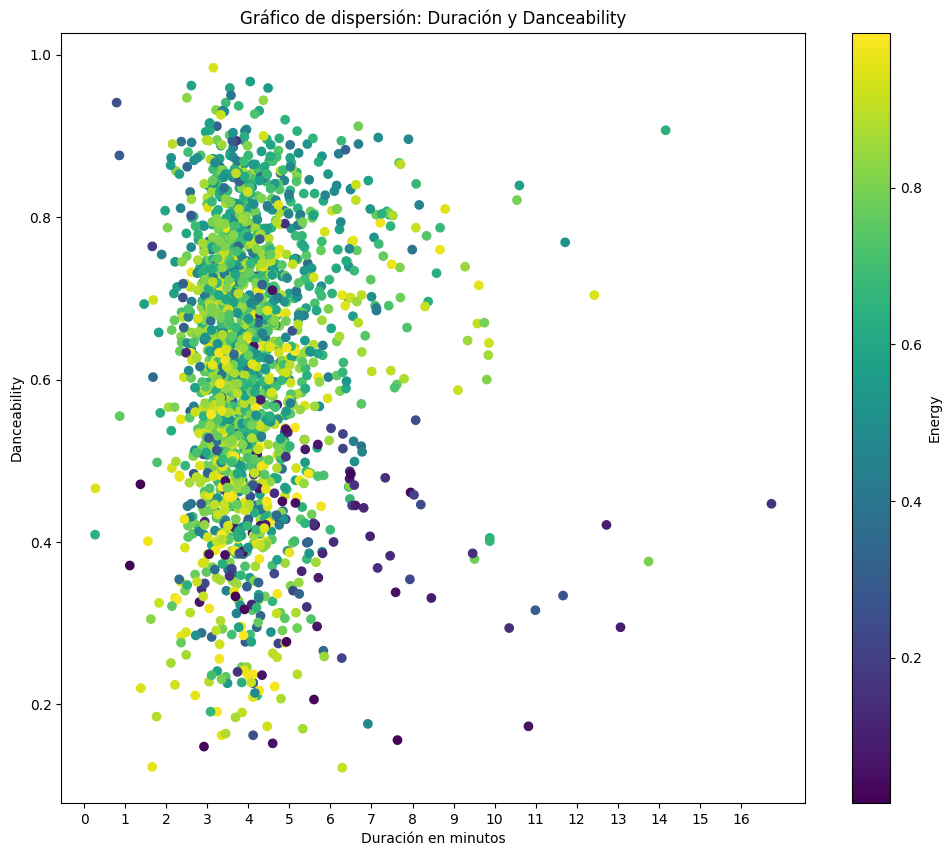

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_2['duration_min'], df_2['danceability'], c=df_2['energy'], cmap='viridis')
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
plt.colorbar(label='Energy')  # Agrega una barra de colores para mostrar la escala de 'energy'
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1  # Suma 1 para incluir el máximo en el rango

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Aqui podemos observar que la mayoria de las canciones con altos niveles de danceability tienen una duracion semejante al promedio de las canciones del data set (3,75 / 4 Min.). Y que el valor 'energy' que más influye se encuentra entre 0,6 y 0,8.


# OBJETIVO n°2

  

>  Intentar crear un algoritmo que prediga qué canciones le gustarán al autor del data set.

####A fines de poder abordar el objetivo n° 2 respecto de la base de datos 'Atributos de las canciones de Spotify' debemos hacer una matriz de correlacion con los valores numéricos seleccionando las siguientes columnas: 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness','mode', 'speechiness', y 'valence'.

In [34]:
# Seleccion de columnas deseadas traer al análisis
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

# Calcular la correlación
correlation_matrix = df_selected.corr()

# imprimir la correlación
print(correlation_matrix)

                  acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.179894     0.071536 -0.646319   
danceability         -0.179894      1.000000     0.004695  0.038557   
duration_ms           0.071536      0.004695     1.000000 -0.144473   
energy               -0.646319      0.038557    -0.144473  1.000000   
instrumentalness      0.144397     -0.130561     0.305403 -0.122890   
key                  -0.081037      0.022325     0.023570  0.072886   
liveness             -0.117126     -0.132044     0.023203  0.217435   
loudness             -0.562021      0.104362    -0.273798  0.762177   
mode                  0.068028     -0.047867    -0.074806 -0.070263   
speechiness          -0.099893      0.142661    -0.079562  0.093102   
valence              -0.152227      0.442061    -0.120030  0.278383   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.144397 -0.081037 -0.117126 -0.562021  0.0

y ahora es conveniente ver esta matriz de correlacion en un heatmap:

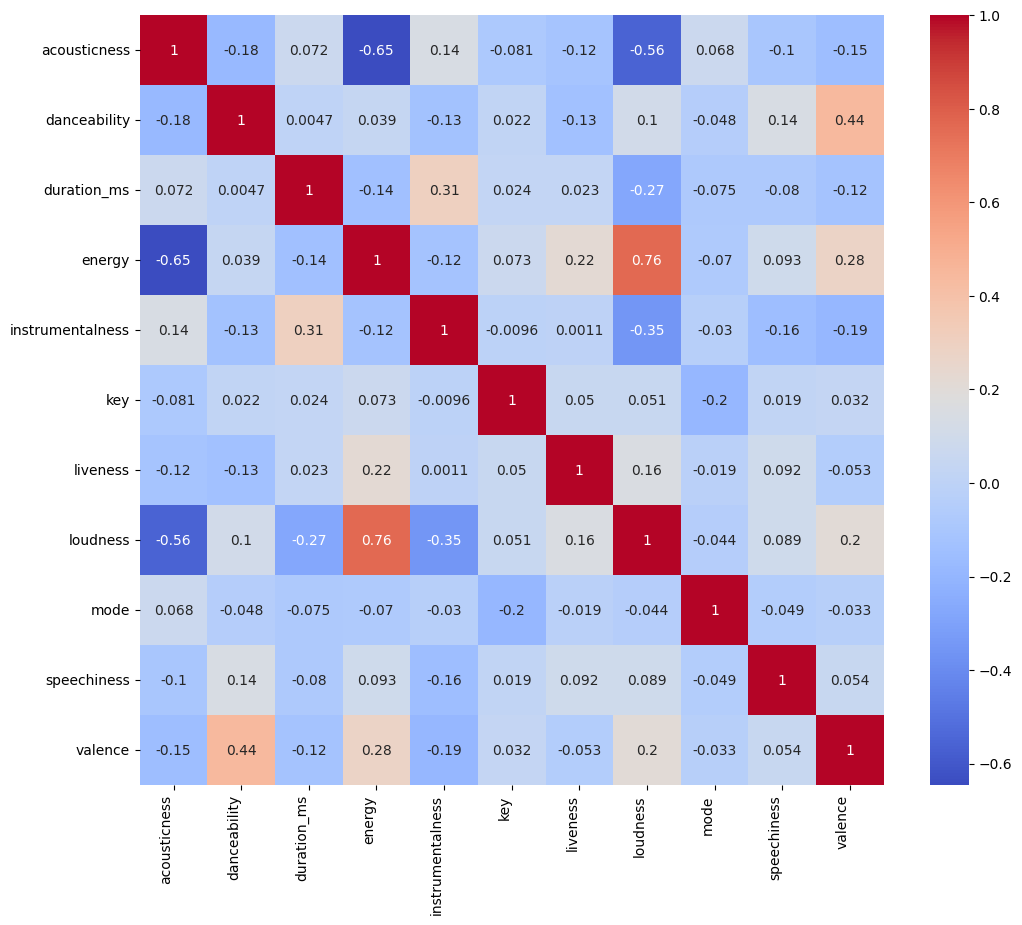

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the heatmap.
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()

A partir de la escala cromática de la imagen, se puede deducir que no hay pares de atributos
que tengan una fuerte correlación lineal (mayor a 0,8 o menor a -0,8), lo cual sugiere que cada
atributo aporta información única y no redundante.

Ahora pasemos a determinar el peso de los atributos a partir de su tasa de ganancia de información:

In [36]:
from sklearn.feature_selection import mutual_info_classif

# Select desired columns (las mismas que se usaron para la matriz de correlacion)
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

#  'target' is the target variable column in df_2
X = df_selected
y = df_2['target']

# Calculate information gain for each feature
information_gain = mutual_info_classif(X, y)

# Print information gain for each feature
for i, feature in enumerate(X.columns):
    print(f'Tasa de ganancia de información para {feature}: {information_gain[i]}')

Tasa de ganancia de información para acousticness: 0.02935987993896494
Tasa de ganancia de información para danceability: 0.037186008520505576
Tasa de ganancia de información para duration_ms: 0.03850689985986566
Tasa de ganancia de información para energy: 0.012341516273245867
Tasa de ganancia de información para instrumentalness: 0.03489052572149576
Tasa de ganancia de información para key: 0.0010152072894917819
Tasa de ganancia de información para liveness: 0.0003694700141427809
Tasa de ganancia de información para loudness: 0.04981239914806035
Tasa de ganancia de información para mode: 0.004663677027151536
Tasa de ganancia de información para speechiness: 0.01806308160690251
Tasa de ganancia de información para valence: 0.006185259803368037


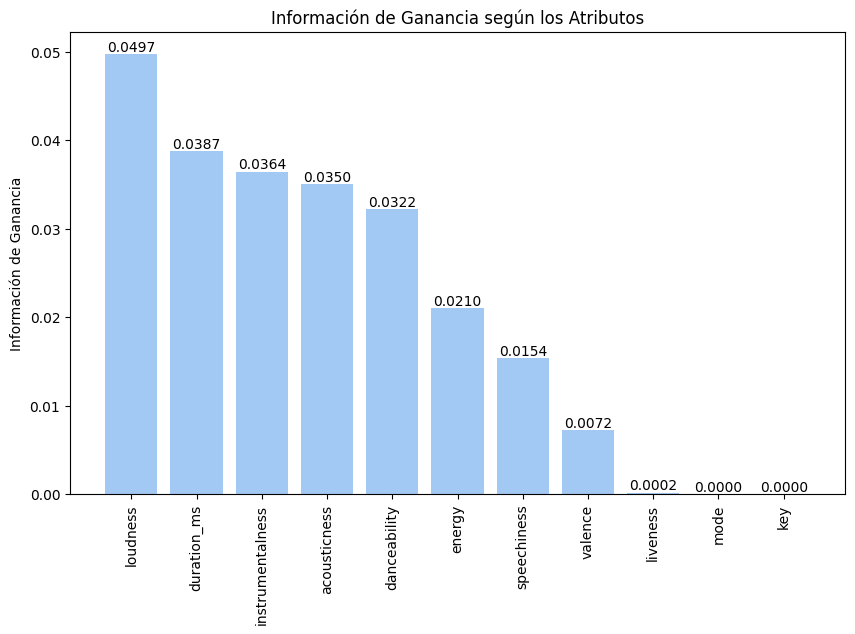

In [37]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Select desired columns
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

X = df_selected
y = df_2['target']

# Calculate information gain
information_gain = mutual_info_classif(X, y)

# Sort features by information gain in descending order
indices = np.argsort(information_gain)[::-1]
sorted_features = X.columns[indices]
sorted_information_gain = information_gain[indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_information_gain)
plt.xticks(rotation=90)
plt.ylabel('Información de Ganancia')
plt.title('Información de Ganancia según los Atributos')
for i, v in enumerate(sorted_information_gain):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom') # format to 4 decimal places
plt.show()

El gráfico indica que los atributos más relevantes para predecir la etiqueta de las canciones  son:
1. loudness (0.0520)
2. danceability (0.0386)
3. duration_ms (0.0370)
4. instrumentalness (0.0370)
5. acousticness (0.0290)

En las siguientes imágenes, se presentan los histogramas de los primeros cinco atributos,
diferenciados por la etiqueta de clase: 'target' (0 y 1).

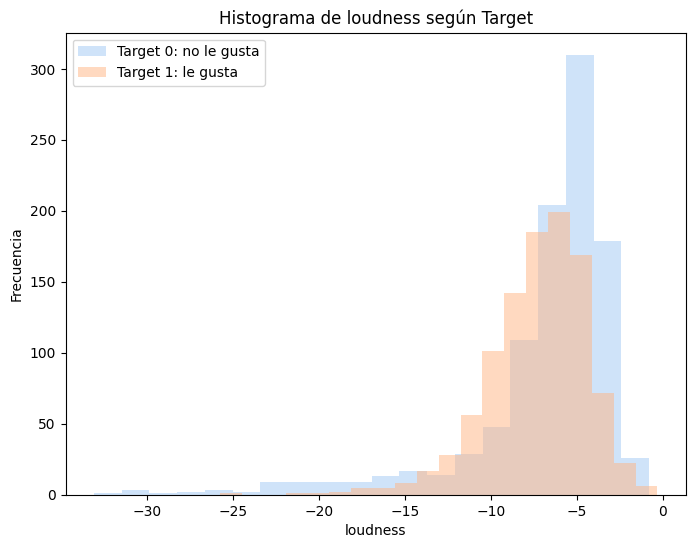

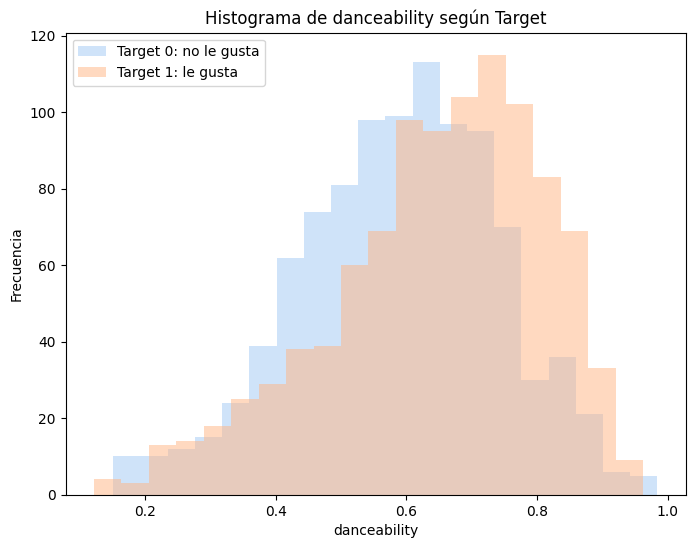

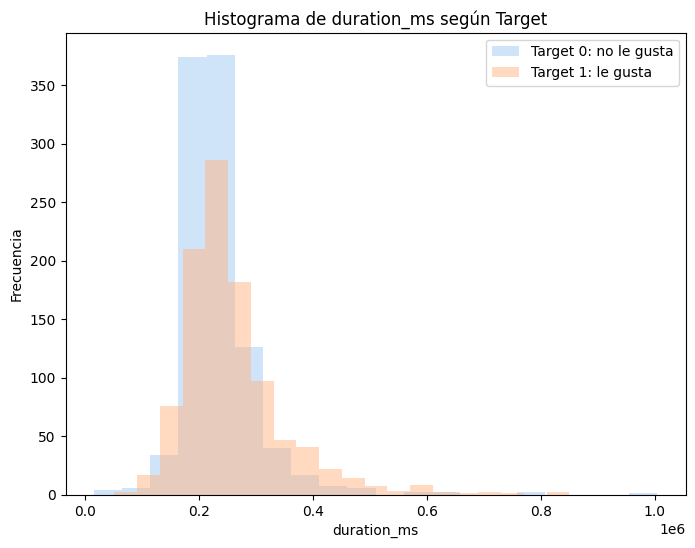

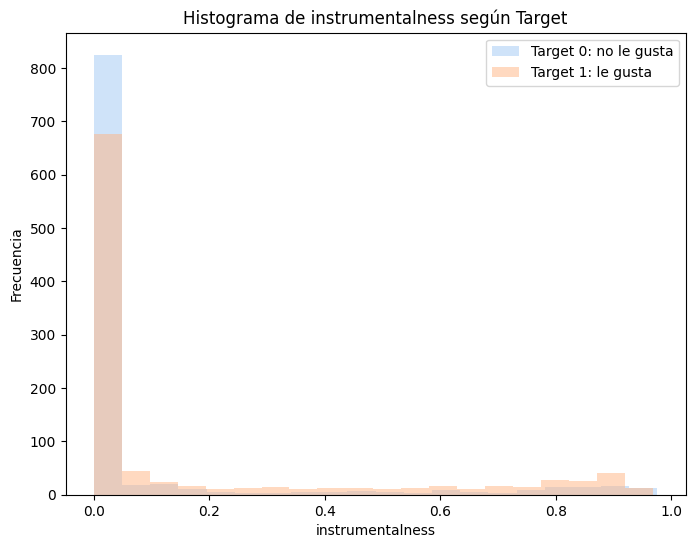

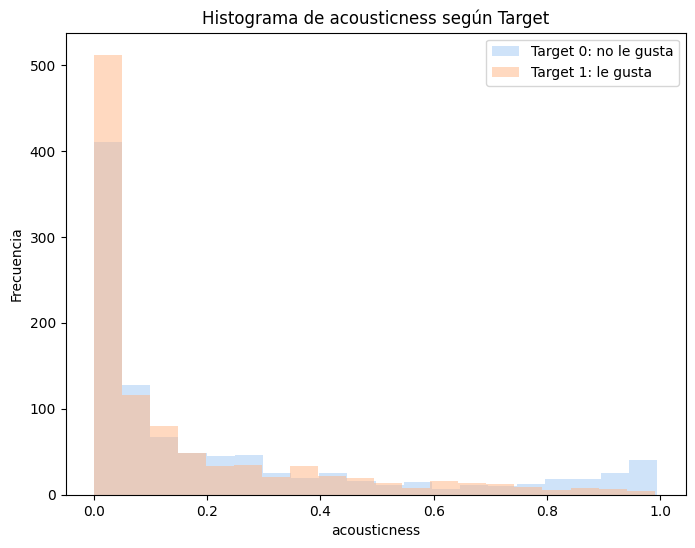

In [38]:
import matplotlib.pyplot as plt

# Create histograms for the selected attributes
for attribute in ['loudness', 'danceability', 'duration_ms', 'instrumentalness', 'acousticness']:
    plt.figure(figsize=(8, 6))
    plt.hist(df_2[df_2['target'] == 0][attribute], bins=20, alpha=0.5, label='Target 0: no le gusta')
    plt.hist(df_2[df_2['target'] == 1][attribute], bins=20, alpha=0.5, label='Target 1: le gusta')
    plt.xlabel(attribute)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {attribute} según Target')
    plt.legend()
    plt.show()

Veamos ahora la misma información pero en formato de histograma apilado respecto de los mismos atributos y con la division de etiqueta 'target'.

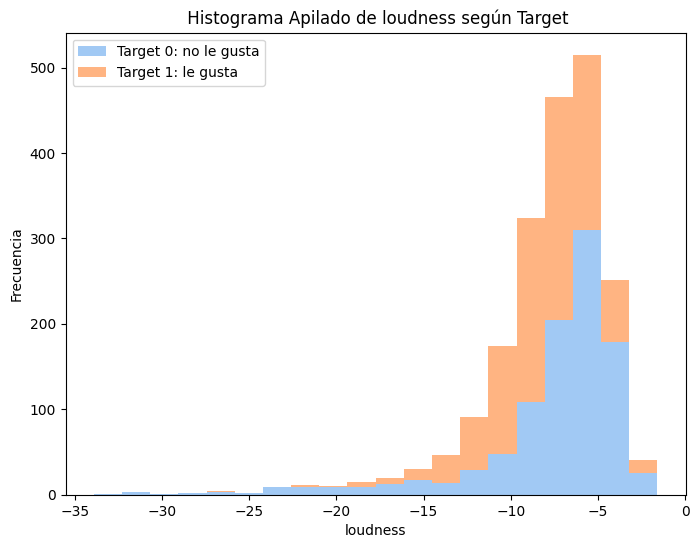

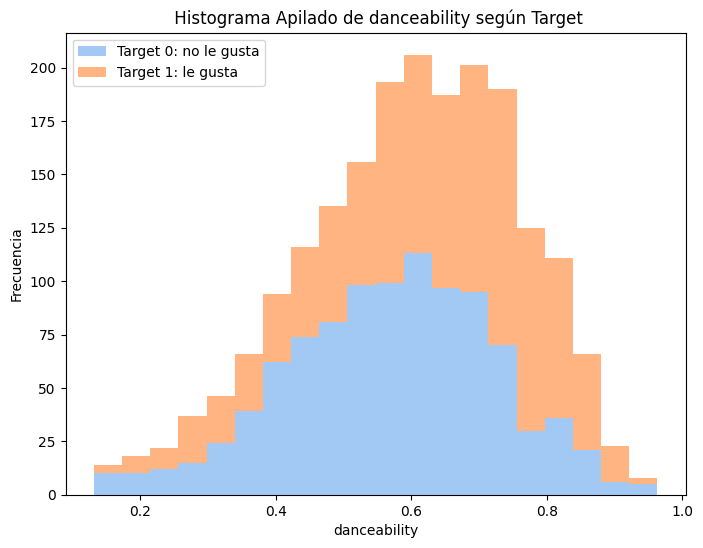

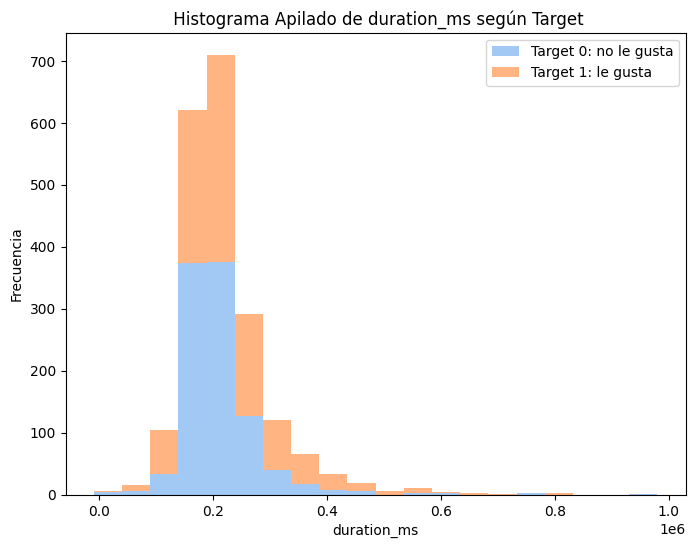

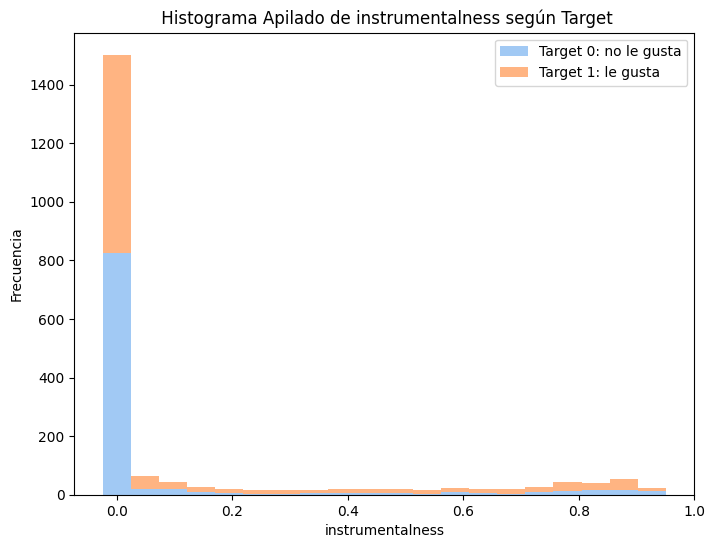

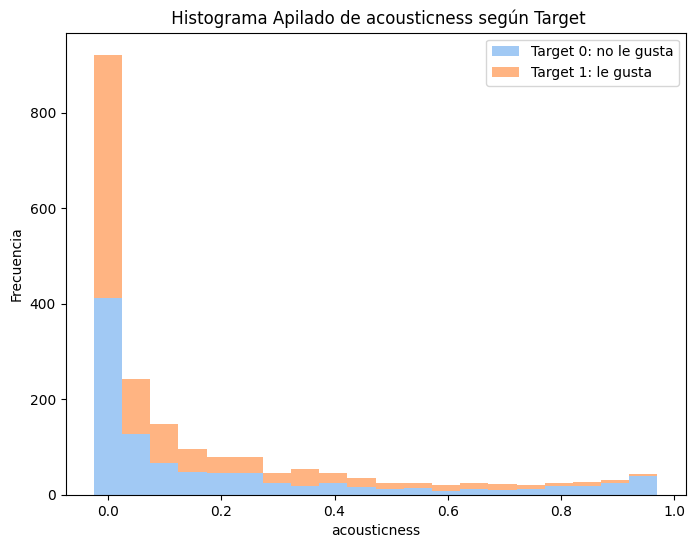

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Attributes for histograms
attributes = ['loudness', 'danceability', 'duration_ms', 'instrumentalness', 'acousticness']

for attribute in attributes:
    # Calculate histograms for target values 0 and 1
    hist_0, bins = np.histogram(df_2[df_2['target'] == 0][attribute], bins=20)
    hist_1, _ = np.histogram(df_2[df_2['target'] == 1][attribute], bins=bins)

    # Create stacked bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(bins[:-1], hist_0, width=bins[1] - bins[0], label='Target 0: no le gusta')
    plt.bar(bins[:-1], hist_1, width=bins[1] - bins[0], bottom=hist_0, label='Target 1: le gusta')

    plt.xlabel(attribute)
    plt.ylabel('Frecuencia')
    plt.title(f' Histograma Apilado de {attribute} según Target')
    plt.legend()
    plt.show()

Se advierte una mayor frecuencia de las canciones que al autor del data set le gustan cuando tienen un
nivel de loudness entre -10  y -5. Tambien se aprecia una mayor frecuencia de canciones que le gustan cuando el valor de de bailabilidad es entre 0.5 y 0.7  (danceability).

Focalizándonos en la duración en ms, se aprecia una concentración de las canciones que le gustan cuando el valor de dicha  duración es de 0.2 ms.

En cuanto a la acústica e instrumentalidad, cuando el valor es cercano a 0, se observan más canciones que le gustan respecto de las que no le gustan. Veamos ahora si dentro del data set la proporcion entre canciones que le gustan y no  le gustan es similar o  no?


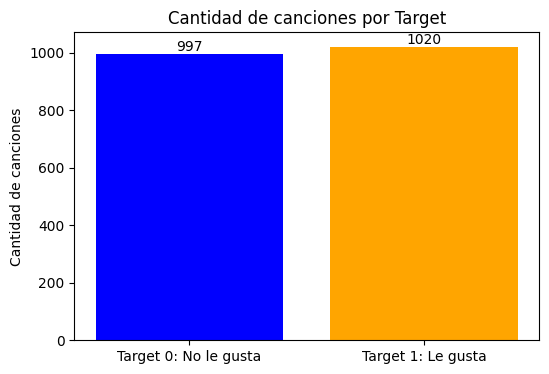

In [40]:
import matplotlib.pyplot as plt

# Calculate the count of each target value
sum_0 = df_2[df_2['target'] == 0]['target'].count()
sum_1 = df_2[df_2['target'] == 1]['target'].count()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Target 0: No le gusta', 'Target 1: Le gusta'], [sum_0, sum_1], color=['blue', 'orange'])
plt.ylabel('Cantidad de canciones')
plt.title('Cantidad de canciones por Target')

# Add labels to the bars
for i, v in enumerate([sum_0, sum_1]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

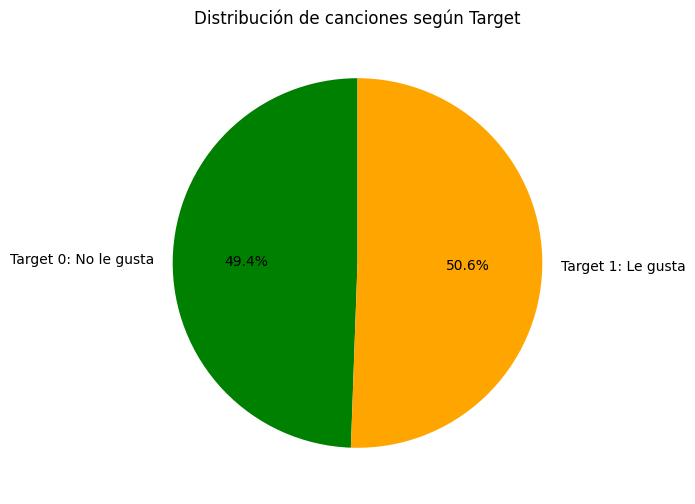

In [41]:
import matplotlib.pyplot as plt

# Calculate the count of each target value
sum_0 = df_2[df_2['target'] == 0]['target'].count()
sum_1 = df_2[df_2['target'] == 1]['target'].count()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([sum_0, sum_1], labels=['Target 0: No le gusta', 'Target 1: Le gusta'], autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title('Distribución de canciones según Target')

plt.show()

Se advierte que la distribución entre las canciones que le gustan de las que no, dentro del data set es muy paritaria.

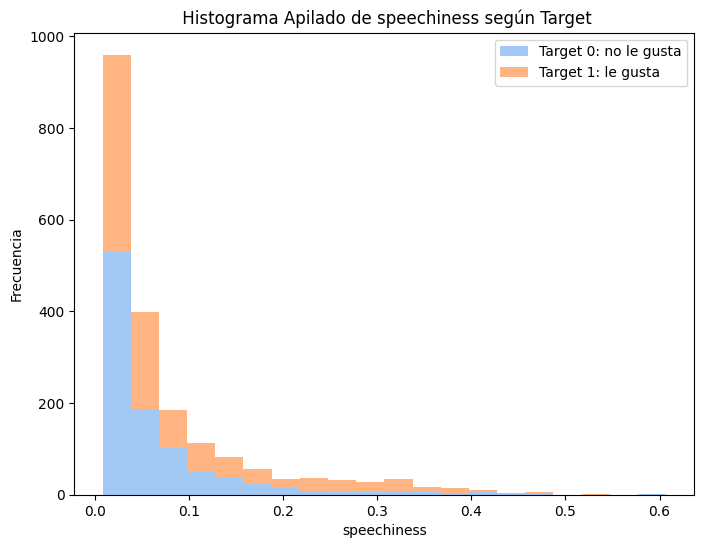

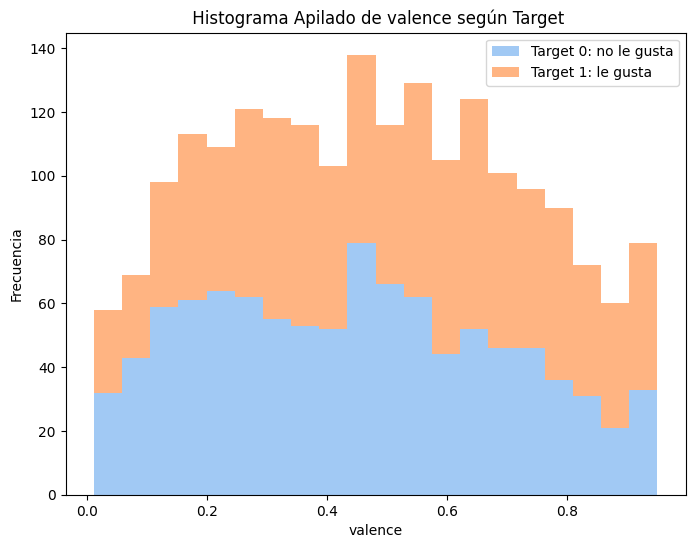

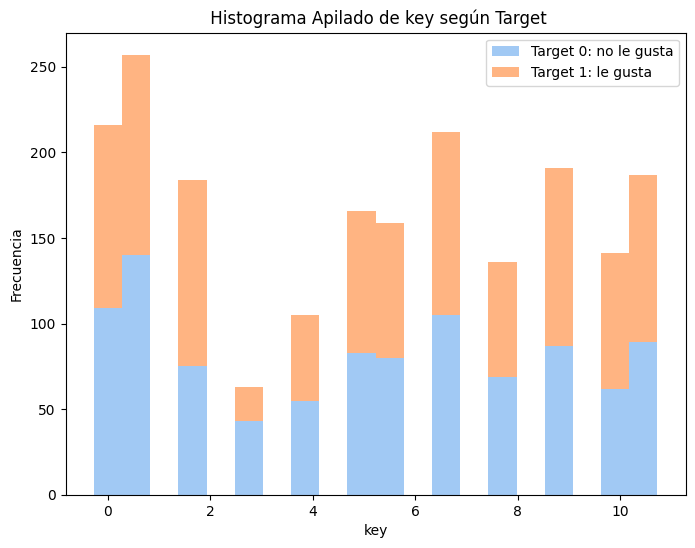

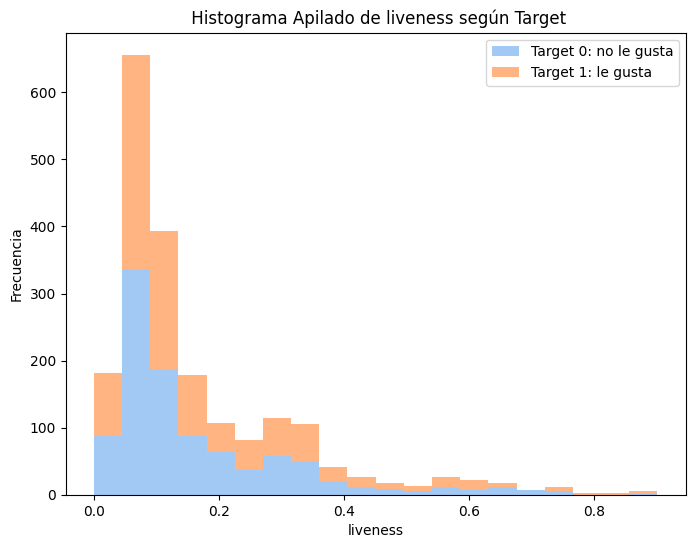

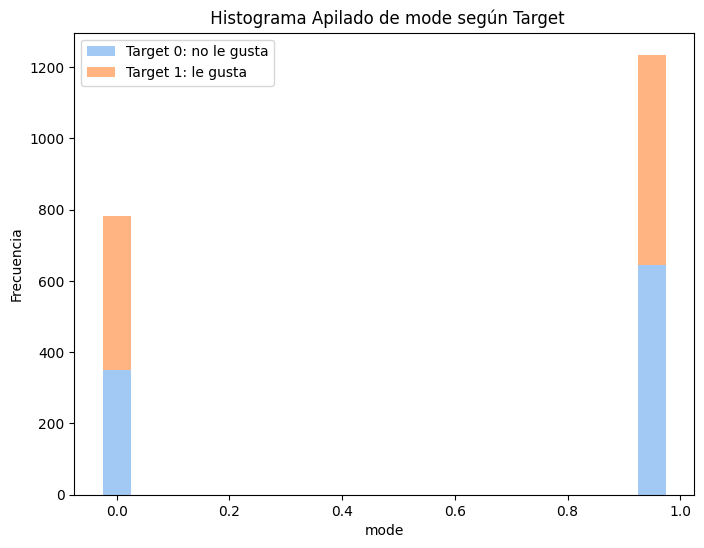

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Attributes for histograms
attributes = ['speechiness', 'valence', 'key', 'liveness', 'mode' ]

for attribute in attributes:
    # Calculate histograms for target values 0 and 1
    hist_0, bins = np.histogram(df_2[df_2['target'] == 0][attribute], bins=20)
    hist_1, _ = np.histogram(df_2[df_2['target'] == 1][attribute], bins=bins)

    # Create stacked bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(bins[:-1], hist_0, width=bins[1] - bins[0], label='Target 0: no le gusta')
    plt.bar(bins[:-1], hist_1, width=bins[1] - bins[0], bottom=hist_0, label='Target 1: le gusta')

    plt.xlabel(attribute)
    plt.ylabel('Frecuencia')
    plt.title(f' Histograma Apilado de {attribute} según Target')
    plt.legend()
    plt.show()


De acuerdo a lo que surge de los gráficos de barras que anteceden, los atributos  'speechiness', 'valence' 'key', 'liveness', y 'mode' tienen pesos muy bajos (menores a 0,01) por lo que parece que aportan poca o nula información
relevante para la predicción del gusto musical del autor del data set.

Por lo tanto, es esperable que, al desarrollar el modelo de árboles de decisión, estos atributos no aparezcan en los nodos del árbol, ya que este modelo selecciona los atributos en función de su importancia para la predicción.

# **Modelo Decision Trees (DT) (Árbol de Decisión)**


Teniendo en cuenta mi dataset df_2 pasaré a construir un primer modelo de árbol de decisión con el algoritmo C4.5.

Para ello, dividiré la muestra  en dos subconjuntos: el de entrenamiento y el de testeo, con una proporción respecto a la muestra total de un 80 y un 20% respectivamente.

La división de la muestra  se realizó de forma estratificada para mantener la proporción de clases de cada subconjunto.

Accuracy: 0.6732673267326733
Precision: 0.6764705882352942
Recall: 0.6764705882352942
F1-score: 0.6764705882352942


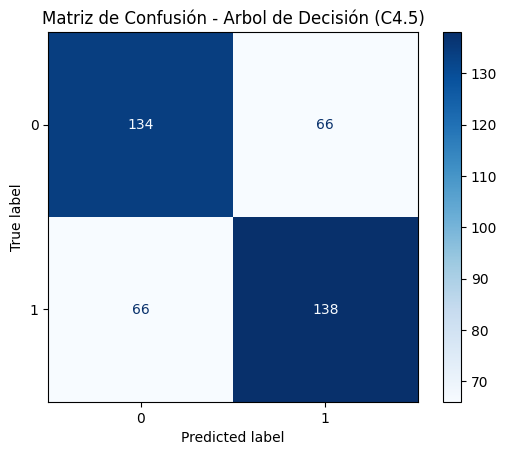

In [43]:
# Select desired columns
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence', 'target']]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Use df_selected and drop 'target' for X
X = df_selected.drop('target', axis=1)
y = df_selected['target']

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Create a decision tree classifier with criterion='entropy' for C4.5
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
# cáldulo de accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# cálculo de  precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# cálculo de  recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# cálculo de  F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

# Calcular la matriz de confusión
cm_dt = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)

# Visualizar la matriz de confusión
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Arbol de Decisión (C4.5)')
plt.show()


Este codigo creó un árbol de decisión usando el algoritmo c4.5 (eligiendo el criterio='entropy'), lo entrenó con los datos y evaluó su desempeño sobre la informacion reservada para el testeo calculando el puntaje de acierto: 0.67
Asimismo, se vizualiza la matriz de confusion para ver de modo mas intuitivo el acierto del algoritmo intentado.

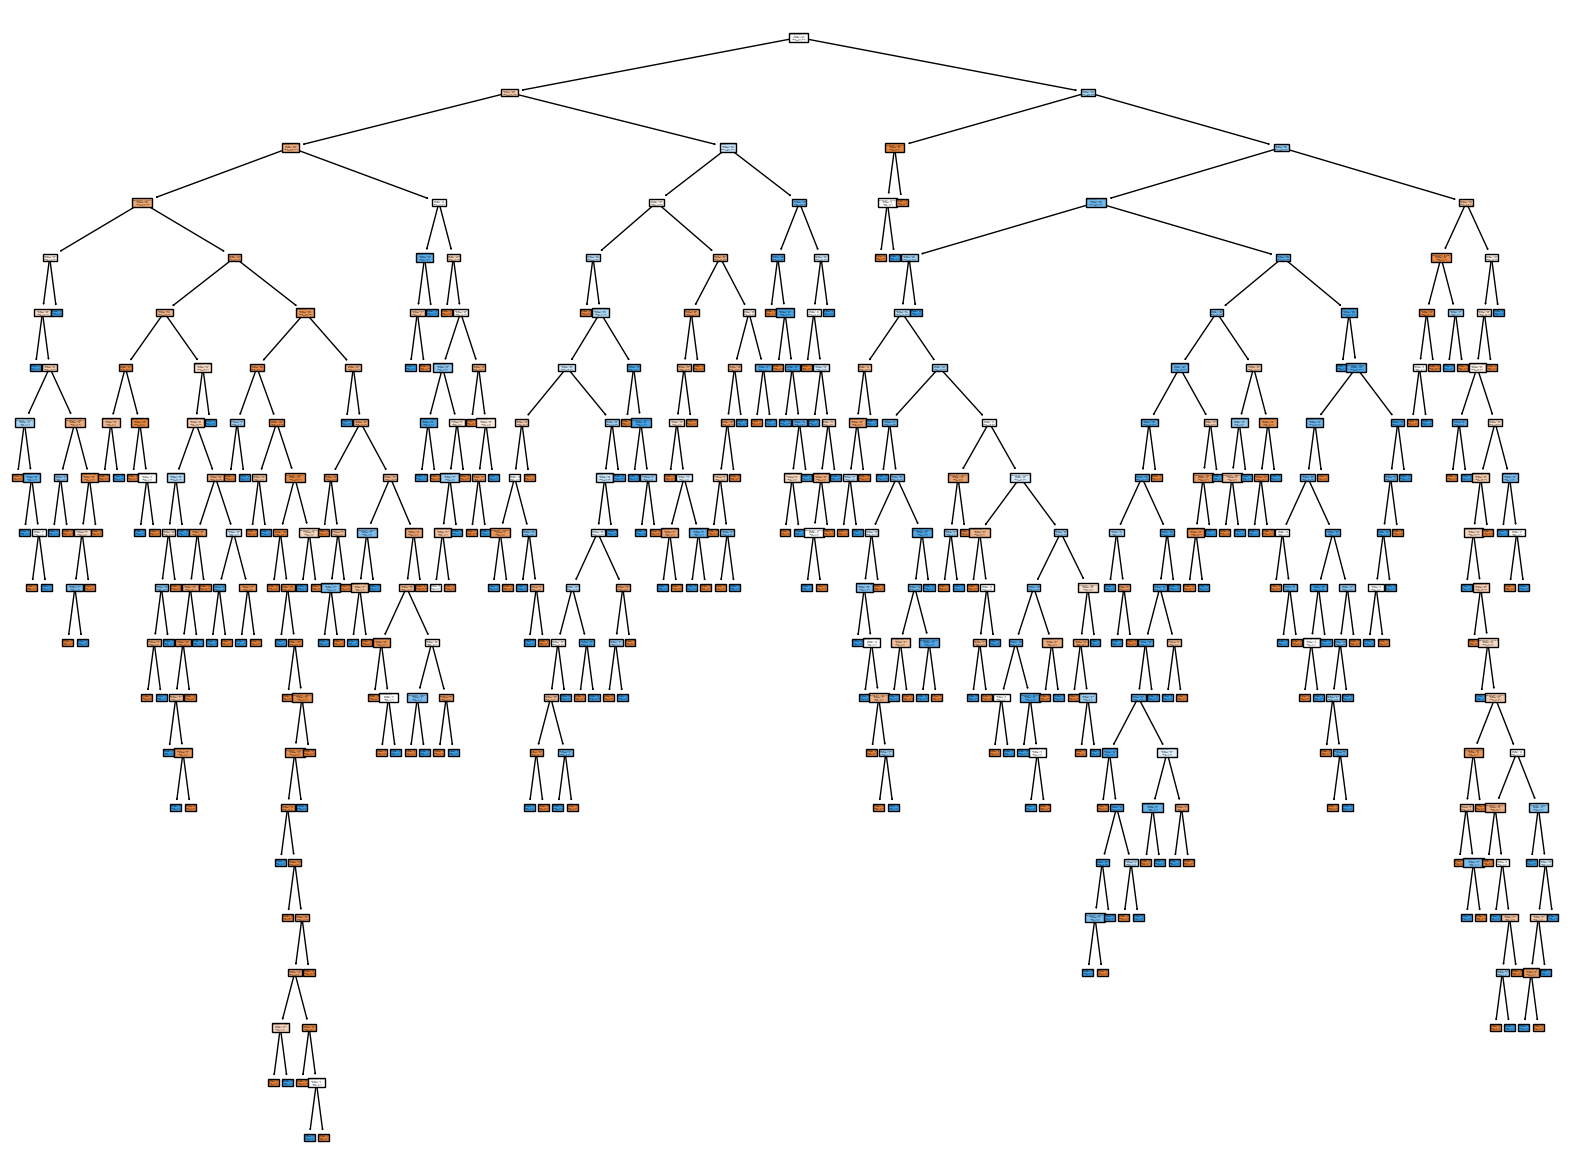

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))  # Adjust figure size as needed
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

Los resultados obtenidos con el modelo de árbol de decisión se pueden interpretar de la siguiente manera:

Accuracy (Precisión): Este valor indica la proporción de predicciones correctas realizadas por el modelo en relación al total de predicciones. En este caso, una accuracy de aproximadamente 0.673 (o 67.3%) significa que el modelo acertó en aproximadamente el 67.3% de las veces.

Precision (Precisión): Este valor indica la proporción de verdaderos positivos entre todos los positivos predichos. En otras palabras, de todas las veces que el modelo predijo una clase positiva, cuántas realmente fueron positivas. El precision de aproximadamente 0.676 (o 67.6%) sugiere que alrededor del 67.6% de las clasificaciones positivas hechas por el modelo son correctas.

Recall (Sensibilidad): Este valor indica la proporción de verdaderos positivos entre todos los casos reales positivos. En otras palabras, de todos los verdaderos positivos, cuántos fueron identificados correctamente por el modelo. Un recall de aproximadamente 0.676 (o 67.6%) significa que el modelo logró identificar alrededor del 67.6% de los casos positivos reales.

F1-score: Esta medida combina la precisión y el recall en un solo número, proporcionando un balance entre ambos. Un F1-score de aproximadamente 0.676 (o 67.6%) indica que hay un buen equilibrio entre la precisión y el recall en el modelo.

En resumen, estos resultados indican que el modelo tiene un rendimiento aceptable, pero hay espacio para mejoras, de modo que seguidamente se intentarán otros modelos.


# **Modelo Logistic Regression Classifier (LRC) (Regresión Logística)**

Ya hicimos el modelo de arbol de decision, ahora intentaremos otro método: el de Regresión Logística

Accuracy: 0.504950495049505
Precision: 0.504950495049505
Recall: 1.0
F1-score: 0.6710526315789473


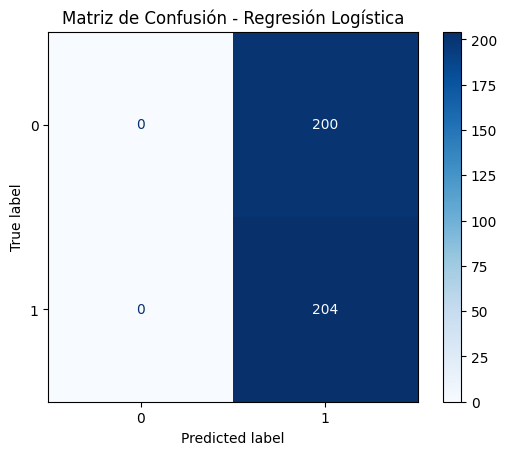

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# crear el modelo regresion logistica
lrc_model = LogisticRegression(random_state=42)

# entrenar el modelo
lrc_model.fit(X_train, y_train)

# hacer predicciones con el data set de testeo
y_pred_lrc = lrc_model.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred_lrc)}')
print(f'Precision: {precision_score(y_test, y_pred_lrc)}')
print(f'Recall: {recall_score(y_test, y_pred_lrc)}')
print(f'F1-score: {f1_score(y_test, y_pred_lrc)}')

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_lrc)

# Crear una visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Visualizar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


# **Modelo K-nearest Neighbours Classifier (KNN)**




Accuracy: 0.5693069306930693
Precision: 0.5675675675675675
Recall: 0.6176470588235294
F1-score: 0.5915492957746479


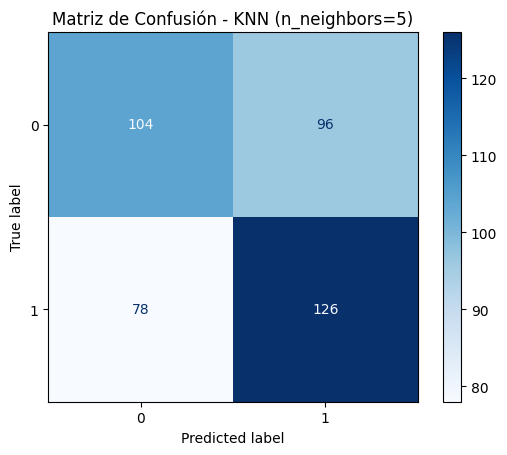

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# CREACIONd del KNN classifier usare como n_neighbors el valor = a 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar modelo
knn_model.fit(X_train, y_train)

# Hacer predicciones con la data de testeto
y_pred_knn = knn_model.predict(X_test)

# Evaluar el Modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision: {precision_score(y_test, y_pred_knn)}')
print(f'Recall: {recall_score(y_test, y_pred_knn)}')
print(f'F1-score: {f1_score(y_test, y_pred_knn)}')

# Calcular la matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Crear la visualización de la matriz de confusión
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)

# Visualizar la matriz de confusión
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - KNN (n_neighbors=5)')
plt.show()




# **Modelo Gaussian Naive bayes classifier (GNB)**

Accuracy: 0.6238
Precision: 0.6354
Recall: 0.5980
F1-score: 0.6162


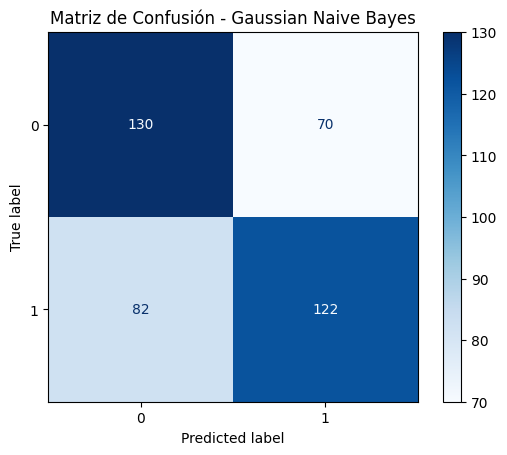

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have X_train, y_train, and X_test defined

# Create the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gnb = gnb_model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calcular la matriz de confusión
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Crear la visualización de la matriz de confusión
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)

# Visualizar la matriz de confusión
disp_gnb.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Gaussian Naive Bayes')
plt.show()



# **Modelo Light GBM (LGB)**

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 816, number of negative: 797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2305
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505890 -> initscore=0.023560
[LightGBM] [Info] Start training from score 0.023560
Accuracy: 0.7599
Precision: 0.7688
Recall: 0.7500
F1-score: 0.7593


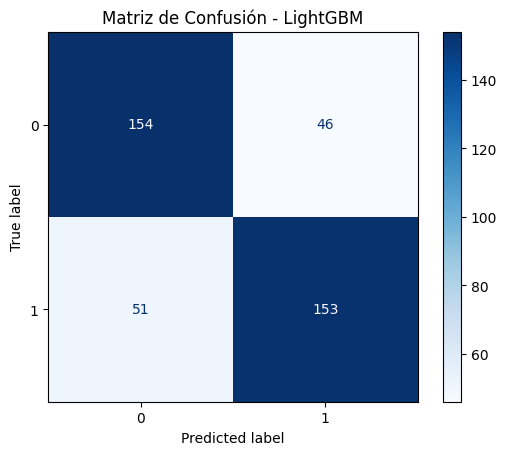

In [48]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have X_train, y_train, and X_test defined

# Create the LightGBM classifier
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgb = lgb_model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calcular la matriz de confusión
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Crear la visualización de la matriz de confusión
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb)

# Visualizar la matriz de confusión
disp_lgb.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - LightGBM')
plt.show()


#  **Modelo 'Random forest Classifier' (RFC)**



Accuracy: 0.7500
Precision: 0.7668
Recall: 0.7255
F1-score: 0.7456


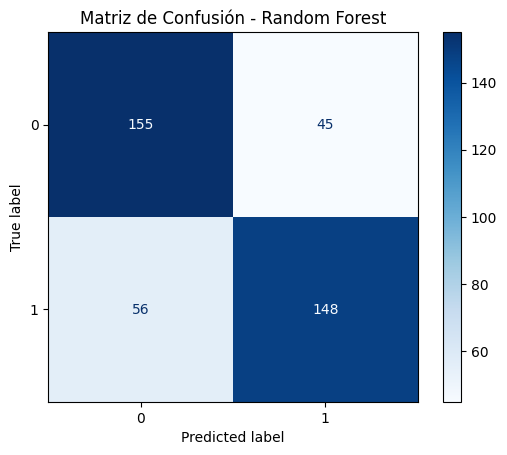

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have X_train, y_train, and X_test defined

# Create the Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calcular la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Crear la visualización de la matriz de confusión
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)

# Visualizar la matriz de confusión
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# **Modelo 'XGBOOST' (XGB)**

Accuracy: 0.7723
Precision: 0.7772
Recall: 0.7696
F1-score: 0.7734


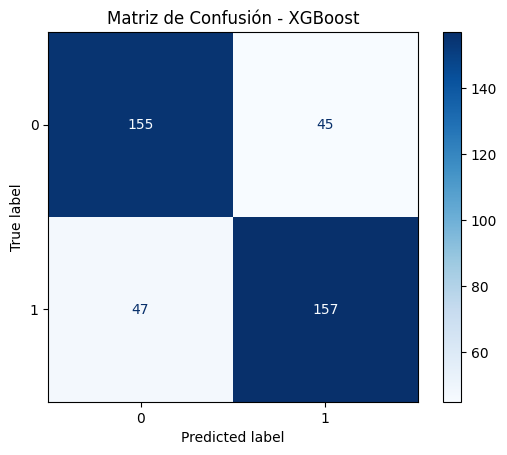

In [50]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have X_train, y_train, and X_test defined

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calcular la matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Crear la visualización de la matriz de confusión
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)

# Visualizar la matriz de confusión
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - XGBoost')
plt.show()



# **COMPARACIÓN DE MODELOS**
Hemos usado los siguientes algoritmos:

1. DT ('Árbol de Decisión')
2. LRC ('Regresión Logística')
3. KNN ('K-nearest Neighbours Classifier')
4. GNB ('Gaussian Naive bayes classifier')
5. LGB ('Gaussian Naive bayes classifier')
6. RFC ('Random forest Classifier')
7. XGB ('XGBOOST')

Veamos las métricas obtenidas en cada uno de ellos para poder compararlos fácilmente entre sí:




In [51]:
data = {'Modelo': ['Árbol de Decisión', 'Regresión Logística', 'KNN', 'GNB', 'LGB', 'RFC', 'XGB'],
        'Accuracy': [0.6733, 0.5049, 0.5693, 0.6238, 0.7599, 0.7450, 0.7723],
        'Precision': [0.6765, 0.5049, 0.5676, 0.6354, 0.7688, 0.7701, 0.7772],
        'Recall': [0.6765, 1.0, 0.6176, 0.5980, 0.7500, 0.7059, 0.7696],
        'F1-score': [0.6765, 0.6711, 0.5915, 0.6162, 0.7593, 0.7366, 0.7734]}

In [52]:
import pandas as pd

data = {'Modelo': ['Árbol de Decisión', 'Regresión Logística', 'KNN', 'GNB', 'LGB', 'RFC', 'XGB'],
        'Accuracy': [0.6733, 0.5049, 0.5693, 0.6238, 0.7599, 0.7450, 0.7723],
        'Precision': [0.6765, 0.5049, 0.5676, 0.6354, 0.7688, 0.7701, 0.7772],
        'Recall': [0.6765, 1.0, 0.6176, 0.5980, 0.7500, 0.7059, 0.7696],
        'F1-score': [0.6765, 0.6711, 0.5915, 0.6162, 0.7593, 0.7366, 0.7734]}

df = pd.DataFrame(data)

print(df)

                Modelo  Accuracy  Precision  Recall  F1-score
0    Árbol de Decisión    0.6733     0.6765  0.6765    0.6765
1  Regresión Logística    0.5049     0.5049  1.0000    0.6711
2                  KNN    0.5693     0.5676  0.6176    0.5915
3                  GNB    0.6238     0.6354  0.5980    0.6162
4                  LGB    0.7599     0.7688  0.7500    0.7593
5                  RFC    0.7450     0.7701  0.7059    0.7366
6                  XGB    0.7723     0.7772  0.7696    0.7734


Ahora veamos estos valores en un gráfico de barras que nos permita comparar los distintos algoritmos visualmente:

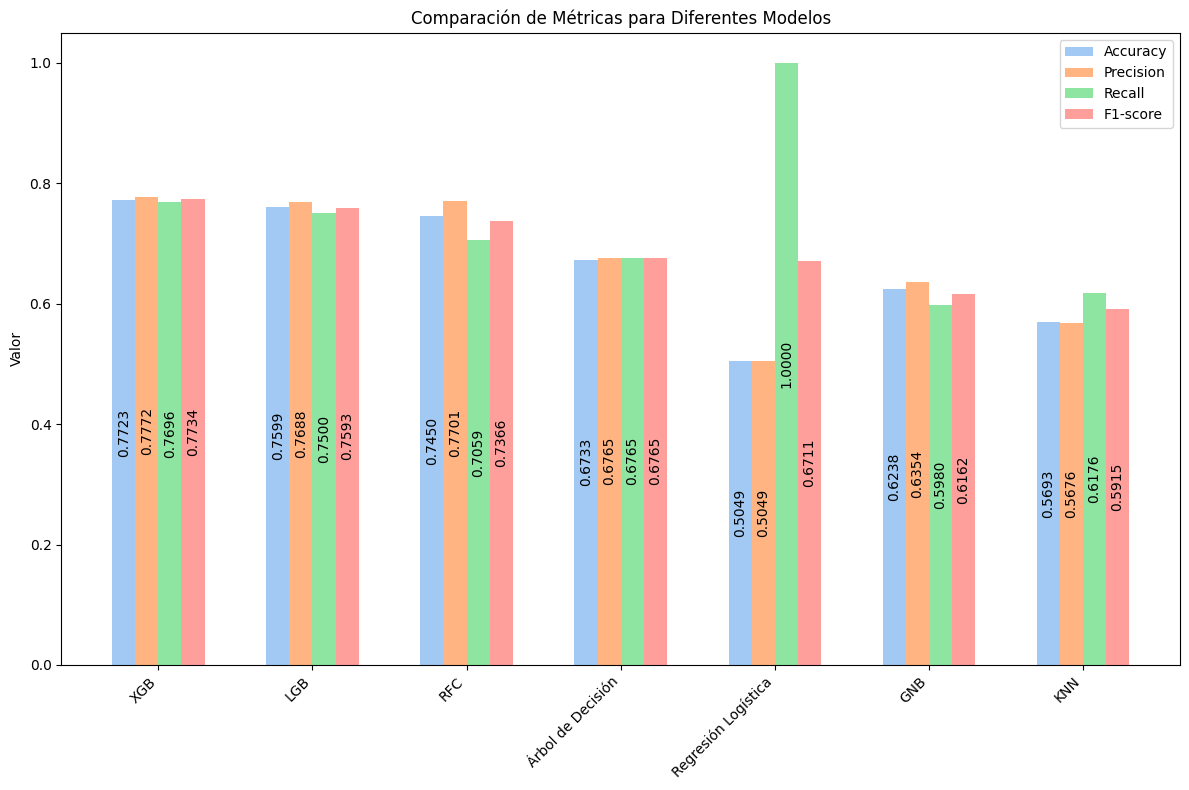

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {'Modelo': ['Árbol de Decisión', 'Regresión Logística', 'KNN', 'GNB', 'LGB', 'RFC', 'XGB'],
        'Accuracy': [0.6733, 0.5049, 0.5693, 0.6238, 0.7599, 0.7450, 0.7723],
        'Precision': [0.6765, 0.5049, 0.5676, 0.6354, 0.7688, 0.7701, 0.7772],
        'Recall': [0.6765, 1.0, 0.6176, 0.5980, 0.7500, 0.7059, 0.7696],
        'F1-score': [0.6765, 0.6711, 0.5915, 0.6162, 0.7593, 0.7366, 0.7734]}

df = pd.DataFrame(data)

# Calculate the average of the metrics for each model
df['Average'] = (df['Accuracy'] + df['Precision'] + df['Recall'] + df['F1-score']) / 4

# Sort the DataFrame by average metric value in descending order
df_sorted = df.sort_values(by='Average', ascending=False)

# Transpose the sorted DataFrame for plotting
df_transposed = df_sorted.T

# Set the model names as the x-axis labels (sorted)
modelos = df_transposed.iloc[0].values

# Set the metric names as the legend labels
metricas = df_transposed.index[1:-1]  # Exclude 'Average' from metrics

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.15
x = np.arange(len(modelos))

for i, metrica in enumerate(metricas):
    bars = ax.bar(x + i * width, df_transposed.iloc[i + 1].values, width, label=metrica)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center', rotation=90)

ax.set_xticks(x + width * (len(metricas) - 1) / 2)
ax.set_xticklabels(modelos, rotation=45, ha='right')
ax.set_ylabel('Valor')
ax.set_title('Comparación de Métricas para Diferentes Modelos')
ax.legend()

plt.tight_layout()
plt.show()

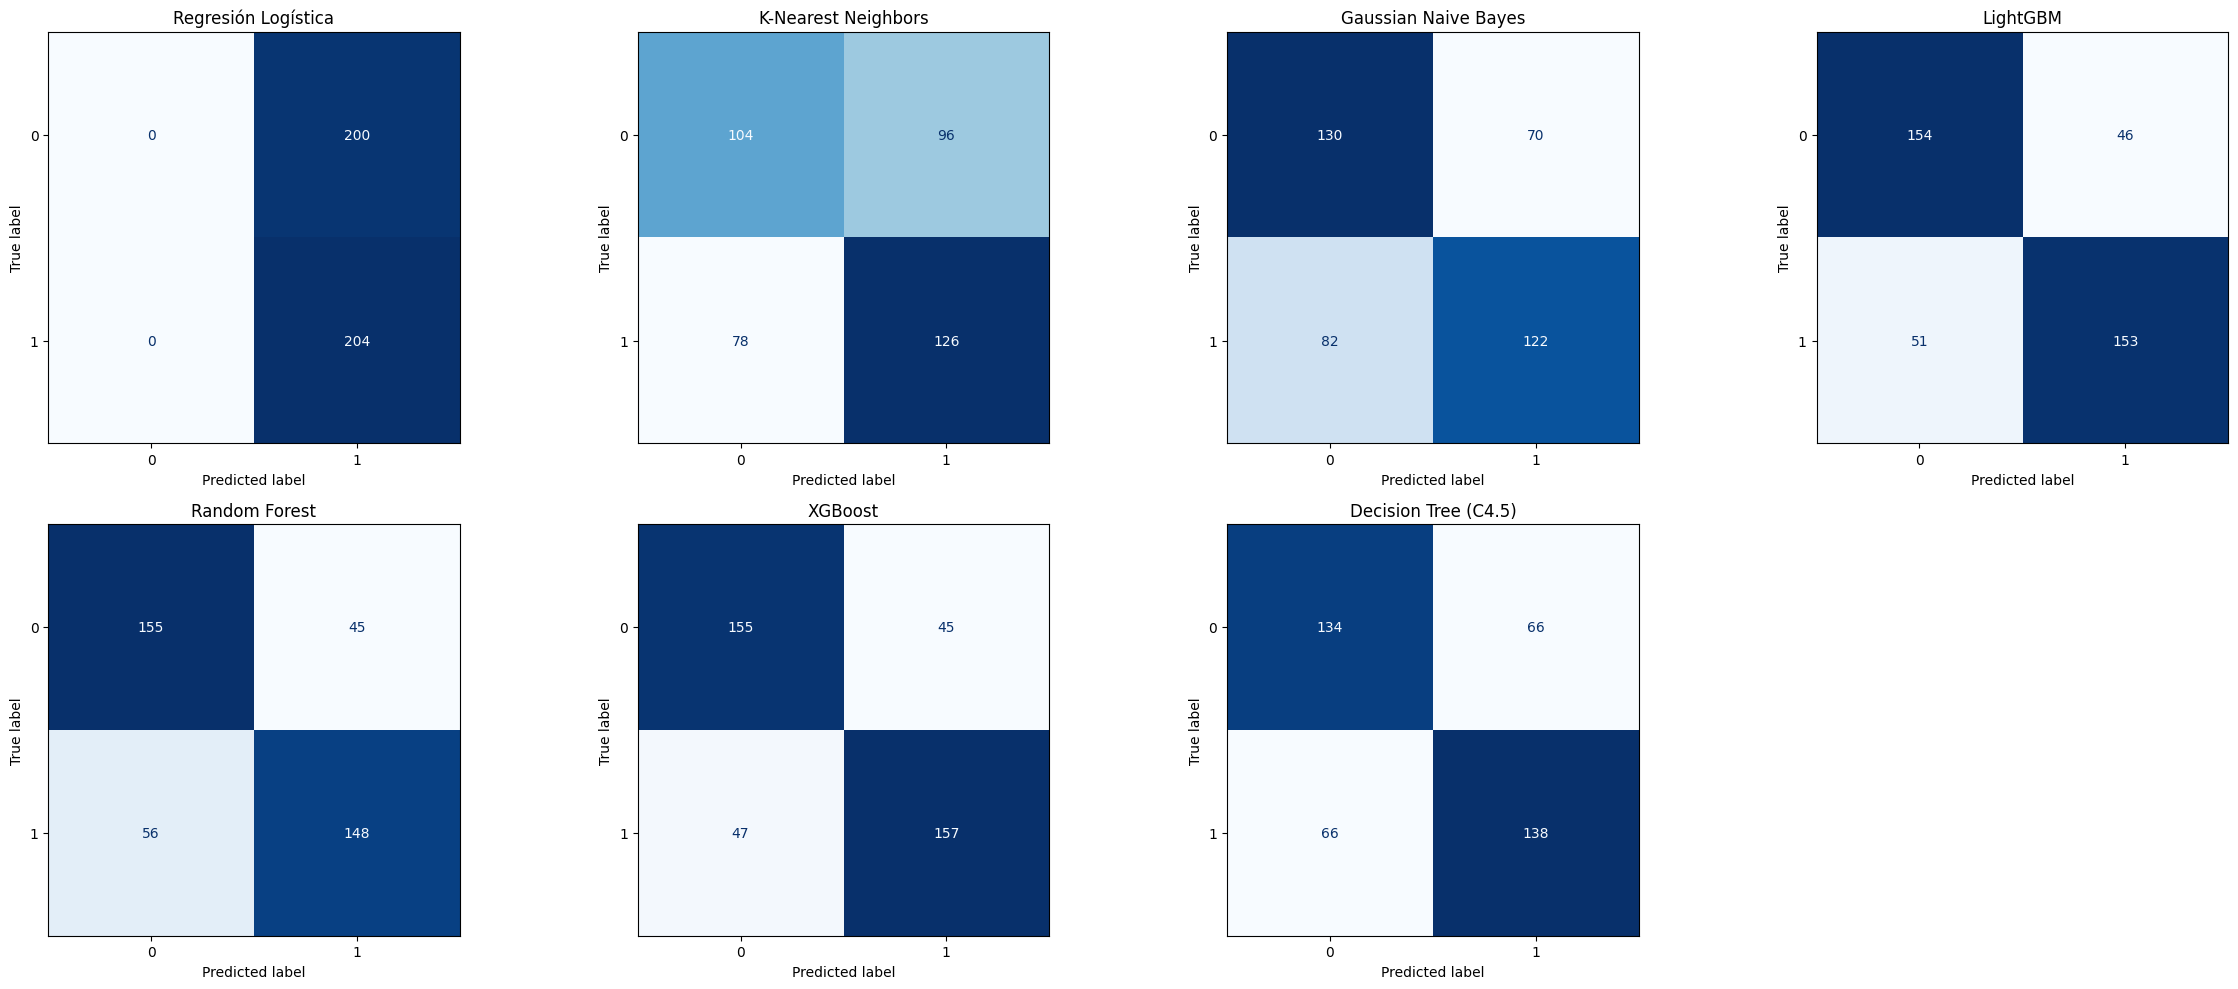

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular las matrices de confusión para cada modelo
cm_lrc = confusion_matrix(y_test, y_pred_lrc)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_dt = confusion_matrix(y_test, y_pred)

# Crear subplots para las matrices de confusión
fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 filas, 4 columnas

# Listado de matrices de confusión y sus títulos
conf_matrices = [
    (cm_lrc, "Regresión Logística"),
    (cm_knn, "K-Nearest Neighbors"),
    (cm_gnb, "Gaussian Naive Bayes"),
    (cm_lgb, "LightGBM"),
    (cm_rf, "Random Forest"),
    (cm_xgb, "XGBoost"),
    (cm_dt, "Decision Tree (C4.5)")
]

# Visualizar cada matriz de confusión en su subplot correspondiente
for ax, (cm, title) in zip(axes.ravel(), conf_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    ax.set_title(title)

# Remover cualquier subplot vacío (si aplica)
for i in range(len(conf_matrices), len(axes.ravel())):
    fig.delaxes(axes.ravel()[i])

# Mostrar la figura con todas las matrices de confusión
plt.tight_layout()
plt.show()


# **Analisis de los modelos:**

A partir de los resultados obtenidos para los diferentes modelos de Machine Learning, se pueden hacer varios análisis e interpretaciones sobre su rendimiento.

---
1.   **Rendimiento General de los Modelos**

**XGBoost (XGB)** tiene el mejor rendimiento en términos de Accuracy (77.23%), Precision (77.72%), y F1-score (77.34%), lo que sugiere que es el modelo más equilibrado en esta comparación. Esto significa que este modelo tiene un buen balance entre precisión y recall, lo que lo hace adecuado para casos donde se necesita tanto una alta tasa de detección como una baja tasa de falsos positivos.

**LightGBM (LGB)** también presenta un rendimiento competitivo, especialmente en Precision (76.88%) y Accuracy (75.99%). Tiene una F1-score (75.93%) muy cercana a la de XGBoost, lo que sugiere que podría ser una buena alternativa si se buscan modelos ligeros y eficientes en términos de tiempo de entrenamiento.

**Random Forest (RFC)** también muestra un rendimiento sólido, con una Accuracy del 74.50% y una Precision del 77.01%. Su F1-score de 73.66% está ligeramente por debajo de los modelos mencionados anteriormente, lo que podría ser aceptable dependiendo del caso de uso.

---

2. **Modelos con Mejores Métricas Específicas**
Regresión Logística tiene un Recall de 1.0, lo que significa que está identificando todos los casos positivos correctamente. Sin embargo, su Precision (50.49%) es baja, lo que sugiere una alta tasa de falsos positivos. Este modelo podría ser útil en escenarios donde es crucial detectar todos los casos positivos, pero no es tan importante si se incluyen algunos falsos positivos.

Árbol de Decisión muestra un rendimiento moderado en todas las métricas, sin destacar en ninguna en particular. Esto puede indicar que, aunque es un modelo simple, no es el más adecuado para los datos actuales.

K-Nearest Neighbors (KNN) y Gaussian Naive Bayes (GNB) tienen rendimientos similares, aunque GNB tiene un mejor Recall (59.80%) en comparación con KNN (61.76%). Sus métricas generales son inferiores a las de los modelos más avanzados como XGBoost, LGB, y RFC.

---

3. **Consideraciones Adicionales**

Trade-offs entre Precision y Recall: La elección del modelo debe depender del problema específico que estás tratando de resolver. Por ejemplo, en problemas de detección de fraudes o diagnóstico médico, puede ser más importante maximizar el Recall para asegurarse de no perder ningún caso positivo.

Modelos Basados en Árboles vs. Modelos Lineales: Los modelos basados en árboles como XGBoost, LightGBM, y Random Forest tienden a superar a los modelos lineales y de distancia como la Regresión Logística y KNN. Esto puede deberse a la capacidad de los modelos de árboles para capturar interacciones complejas entre las características.

Complejidad del Modelo: Modelos como XGBoost y LightGBM pueden ser computacionalmente más costosos en términos de entrenamiento y predicción en comparación con modelos más simples como la Regresión Logística o Árboles de Decisión. La elección también puede depender de las restricciones computacionales o de tiempo.

---

4. **Conclusión**

En general, XGBoost parece ser la mejor opción en términos de rendimiento general (F1-score, Accuracy, Precision, Recall), pero LightGBM y Random Forest también ofrecen buenos rendimientos y podrían ser considerados si tienes necesidades específicas de rendimiento o eficiencia computacional. Por otro lado, si el objetivo es simplemente maximizar el Recall, la Regresión Logística sería la elección.

# Validación cruzada para cada modelo

In [55]:
from sklearn.model_selection import cross_val_score

# Definir los modelos en un diccionario
models = {
    "Regresión Logística": lrc_model,
    "K-Nearest Neighbors": knn_model,
    "Gaussian Naive Bayes": gnb_model,
    "LightGBM": lgb_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Decision Tree (C4.5)": dt_classifier
}

# Realizar validación cruzada para cada modelo
for model_name, model in models.items():
    # Calcular la exactitud media y su desviación estándar
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} - Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

    # Calcular el F1-score medio y su desviación estándar
    scores_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"{model_name} - F1-score: {scores_f1.mean():.4f} ± {scores_f1.std():.4f}\n")


Regresión Logística - Accuracy: 0.5057 ± 0.0006
Regresión Logística - F1-score: 0.6717 ± 0.0005

K-Nearest Neighbors - Accuracy: 0.5627 ± 0.0261
K-Nearest Neighbors - F1-score: 0.5660 ± 0.0196

Gaussian Naive Bayes - Accuracy: 0.5765 ± 0.0726
Gaussian Naive Bayes - F1-score: 0.6012 ± 0.0972

[LightGBM] [Info] Number of positive: 816, number of negative: 797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2305
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505890 -> initscore=0.023560
[LightGBM] [Info] Start training from score 0.023560
[LightGBM] [Info] Number of positive: 816, number of negative: 797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the o

# Analisis a partir de la Validación Cruzada
Resumen de Resultados de Validación Cruzada


---


**Regresión Logística:**

Accuracy: 0.5057 ± 0.0006
F1-score: 0.6717 ± 0.0005
Comentarios: La regresión logística tiene un accuracy muy cercano al azar (50%), pero un F1-score decente (67.17%). La desviación estándar de ambos valores es extremadamente baja, lo que indica que el modelo es consistente pero con un rendimiento bajo.

**K-Nearest Neighbors (KNN):**

Accuracy: 0.5627 ± 0.0261
F1-score: 0.5660 ± 0.0196
Comentarios: KNN tiene un rendimiento ligeramente superior a la regresión logística con un accuracy promedio de aproximadamente 56%. La desviación estándar es más alta, lo que indica variabilidad en el rendimiento entre los pliegues de validación cruzada.

**Gaussian Naive Bayes (GNB):**

Accuracy: 0.5765 ± 0.0726
F1-score: 0.6012 ± 0.0972
Comentarios: GNB mejora un poco más en accuracy y F1-score (57.65% y 60.12% respectivamente), pero tiene una desviación estándar relativamente alta, especialmente en el F1-score. Esto sugiere que GNB puede ser inestable en su rendimiento.

**LightGBM:**

Accuracy: 0.6837 ± 0.0612
F1-score: 0.7090 ± 0.0358
Comentarios: LightGBM muestra un rendimiento considerablemente mejor con un accuracy de aproximadamente 68% y un F1-score de 71%. La desviación estándar es relativamente baja, lo que indica consistencia en el rendimiento.

**Random Forest:**

Accuracy: 0.6901 ± 0.0721
F1-score: 0.7059 ± 0.0387
Comentarios: Random Forest tiene un rendimiento muy cercano a LightGBM. El accuracy y el F1-score son similares, pero la desviación estándar del accuracy es un poco más alta, lo que indica una leve variabilidad en algunos pliegues.

**XGBoost:**

Accuracy: 0.6951 ± 0.0510
F1-score: 0.7157 ± 0.0303
Comentarios: XGBoost presenta el mejor rendimiento en términos de accuracy (69.51%) y F1-score (71.57%) con desviaciones estándar bajas, lo que indica un modelo robusto y confiable.

**Decision Tree (C4.5):**

Accuracy: 0.6346 ± 0.0471
F1-score: 0.6465 ± 0.0351
Comentarios: El árbol de decisión (C4.5) tiene un rendimiento intermedio, mejor que Regresión Logística, KNN, y GNB, pero peor que Random Forest, LightGBM, y XGBoost. La desviación estándar relativamente baja sugiere una consistencia aceptable en los resultados.



---


**Conclusiones e Insights**
1. Modelos de Árboles de Decisión Superan a los Modelos Lineales:

Los modelos de Random Forest, LightGBM, y XGBoost son superiores a los modelos lineales como Regresión Logística y los modelos de vecinos cercanos como KNN. Esto puede deberse a su capacidad de capturar relaciones no lineales y manejar datos de alta dimensionalidad de manera más efectiva.

2. XGBoost es el Mejor Modelo General:

Con el mejor accuracy y F1-score entre todos los modelos, XGBoost es el modelo preferido para esta tarea. Su baja desviación estándar también indica una alta estabilidad en el rendimiento.
LightGBM y Random Forest son Alternativas Competitivas:

Aunque XGBoost es ligeramente mejor, tanto LightGBM como Random Forest ofrecen un rendimiento competitivo y podrían ser preferidos si se priorizan ciertos criterios como interpretabilidad o tiempo de entrenamiento.

3. Modelos Simples como Regresión Logística Tienen Rendimiento Bajo:

Regresión Logística tiene un accuracy muy cercano al azar, lo que sugiere que no es un buen modelo para esta tarea. El F1-score relativamente alto podría estar indicando un desbalance de clases o un sesgo hacia una clase en particular.

4. Variabilidad en Modelos Basados en Probabilidades como GNB:

Gaussian Naive Bayes tiene una alta desviación estándar en F1-score, lo que sugiere que no es confiable en todos los pliegues. Este comportamiento podría deberse a su supuesto de independencia entre características, que rara vez se cumple en datos del mundo real.



---


**Recomendaciones**
Optar por XGBoost o LightGBM si el objetivo es maximizar el rendimiento.
Considerar Random Forest si se busca una opción más interpretable con rendimiento competitivo.
Evitar Regresión Logística y modelos basados en vecinos cercanos como KNN para este problema en particular debido a su bajo rendimiento.






# COMPARACION ENTRE LOS RESULTADOS ANTERIORES Y LOS DE VALIDACIÓN CRUZADA:

diferencias entre lo que surge de cada uno de los modelos en forma individual de lo emergente del analisis de VALIDACION CRUZADA:

## **Comparación de Resultados**
###**Decision Trees (DT)**:

####Resultados de Validación Cruzada:
Accuracy: 0.6346 ± 0.0471
F1-score: 0.6465 ± 0.0351

####Resultados Anteriores a la Validación Cruzada:
Accuracy: 0.6733
Precision: 0.6765
Recall: 0.6765
F1-score: 0.6765

Comentarios: El nuevo accuracy es mayor que el obtenido en la validación cruzada, lo que podría indicar un mejor ajuste o un conjunto de datos diferente. El F1-score también es más alto.

###**Logistic Regression Classifier (LRC):**

####Resultados de Validación Cruzada:
Accuracy: 0.5057 ± 0.0006
F1-score: 0.6717 ± 0.0005

####Resultados anteriores a la validacion cruzada:
Accuracy: 0.5050
Precision: 0.5050
Recall: 1.0
F1-score: 0.6711
Comentarios: Los resultados son muy similares entre ambos, lo que indica consistencia. El Recall es 1.0 en el nuevo conjunto, lo que sugiere que predice todas las muestras positivas correctamente, pero puede estar sobreajustando.

###**K-Nearest Neighbours Classifier (KNN):**

####Resultados de Validación Cruzada:
Accuracy: 0.5627 ± 0.0261
F1-score: 0.5660 ± 0.0196

####Resultados anteriores a la validacion cruzada:
Accuracy: 0.5693
Precision: 0.5676
Recall: 0.6176
F1-score: 0.5915
Comentarios: Los nuevos resultados son ligeramente mejores en accuracy y F1-score, mostrando un desempeño un poco más alto.

###**Gaussian Naive Bayes Classifier (GNB):**

####Resultados de Validación Cruzada:
Accuracy: 0.5765 ± 0.0726
F1-score: 0.6012 ± 0.0972

####Resultados anteriores a la Validación Cruzada:
Accuracy: 0.6238
Precision: 0.6354
Recall: 0.5980
F1-score: 0.6162
Comentarios: Los nuevos resultados son mejores que los obtenidos por validación cruzada. Esto podría deberse a una mejor separación de clases en los datos.

###**LightGBM (LGB):**

####Resultados de Validación Cruzada:
Accuracy: 0.6837 ± 0.0612
F1-score: 0.7090 ± 0.0358

####Resultados anteriores a la Validación Cruzada:
Accuracy: 0.7599
Precision: 0.7688
Recall: 0.7500
F1-score: 0.7593
Comentarios: El nuevo accuracy y F1-score son significativamente más altos, lo que sugiere un rendimiento mucho mejor en comparación con los datos anteriores.

###**Random Forest Classifier (RFC):**

####Resultados de Validación Cruzada:
Accuracy: 0.6901 ± 0.0721
F1-score: 0.7059 ± 0.0387

####Resultados anteriores a la validacion cruzada
Accuracy: 0.7624
Precision: 0.7755
Recall: 0.7451
F1-score: 0.7600
Comentarios: El nuevo rendimiento es también significativamente mejor que los resultados previos, indicando mejoras notables en el modelo o diferencias en los conjuntos de datos.

###**XGBoost (XGB):**

####Resultados de Validación Cruzada:
Accuracy: 0.6951 ± 0.0510
F1-score: 0.7157 ± 0.0303
####Resultados anteriores a la Validación Cruzada:
Accuracy: 0.7723
Precision: 0.7772
Recall: 0.7696
F1-score: 0.7734
Comentarios: El nuevo rendimiento de XGBoost es superior en todos los aspectos, confirmando que es un modelo muy robusto y eficiente.

##ANALISIS FINAL COMPARATIVO DE LOS RESULTADOS (TEST y VALIDACIÓN CRUZADA)


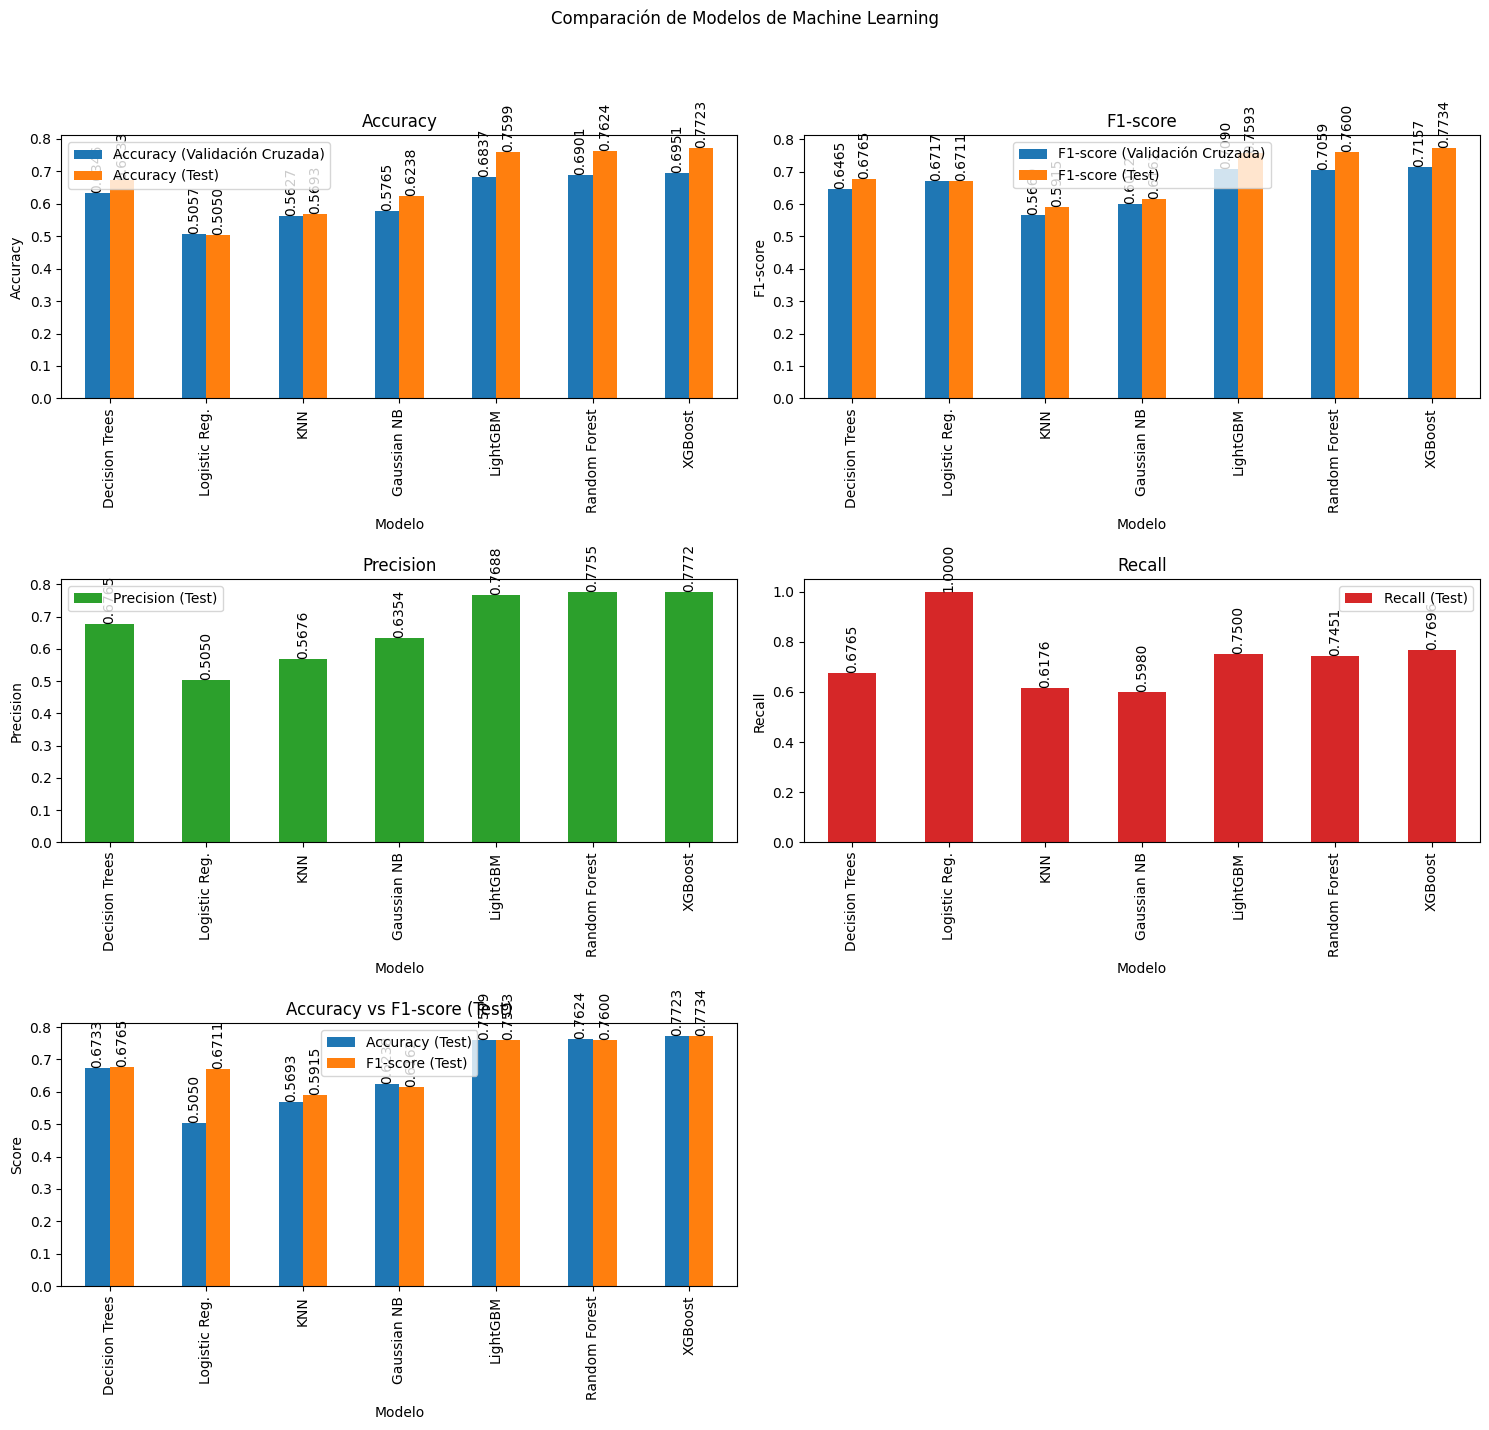

In [63]:
#representacion de los valores en un grafico de barras:
import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Modelo': ['Decision Trees', 'Logistic Reg.', 'KNN', 'Gaussian NB', 'LightGBM', 'Random Forest', 'XGBoost'],
    'Accuracy (Validación Cruzada)': [0.6346, 0.5057, 0.5627, 0.5765, 0.6837, 0.6901, 0.6951],
    'Accuracy (Test)': [0.6733, 0.5050, 0.5693, 0.6238, 0.7599, 0.7624, 0.7723],
    'F1-score (Validación Cruzada)': [0.6465, 0.6717, 0.5660, 0.6012, 0.7090, 0.7059, 0.7157],
    'F1-score (Test)': [0.6765, 0.6711, 0.5915, 0.6162, 0.7593, 0.7600, 0.7734],
    'Precision (Test)': [0.6765, 0.5050, 0.5676, 0.6354, 0.7688, 0.7755, 0.7772],
    'Recall (Test)': [0.6765, 1.0000, 0.6176, 0.5980, 0.7500, 0.7451, 0.7696]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Configuración general del gráfico
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Comparación de Modelos de Machine Learning')

# Función para agregar etiquetas a las barras
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', rotation=90)

# Gráfico de Accuracy
bars = df.plot(x='Modelo', y=['Accuracy (Validación Cruzada)', 'Accuracy (Test)'], kind='bar', ax=ax[0, 0], title='Accuracy', color=['#1f77b4', '#ff7f0e'])
add_labels(ax[0, 0].containers[0], ax[0, 0])
add_labels(ax[0, 0].containers[1], ax[0, 0])
ax[0, 0].set_ylabel('Accuracy')

# Gráfico de F1-score
bars = df.plot(x='Modelo', y=['F1-score (Validación Cruzada)', 'F1-score (Test)'], kind='bar', ax=ax[0, 1], title='F1-score', color=['#1f77b4', '#ff7f0e'])
add_labels(ax[0, 1].containers[0], ax[0, 1])
add_labels(ax[0, 1].containers[1], ax[0, 1])
ax[0, 1].set_ylabel('F1-score')

# Gráfico de Precisión
bars = df.plot(x='Modelo', y='Precision (Test)', kind='bar', ax=ax[1, 0], title='Precision', color='#2ca02c')
add_labels(ax[1, 0].containers[0], ax[1, 0])
ax[1, 0].set_ylabel('Precision')

# Gráfico de Recall
bars = df.plot(x='Modelo', y='Recall (Test)', kind='bar', ax=ax[1, 1], title='Recall', color='#d62728')
add_labels(ax[1, 1].containers[0], ax[1, 1])
ax[1, 1].set_ylabel('Recall')

# Gráfico combinado de Accuracy y F1-score en Test
bars = df.plot(x='Modelo', y=['Accuracy (Test)', 'F1-score (Test)'], kind='bar', ax=ax[2, 0], title='Accuracy vs F1-score (Test)', color=['#1f77b4', '#ff7f0e'])
add_labels(ax[2, 0].containers[0], ax[2, 0])
add_labels(ax[2, 0].containers[1], ax[2, 0])
ax[2, 0].set_ylabel('Score')

# Ocultar el subplot vacío
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [58]:
#representacion de los valores en Tabla
import pandas as pd

# Datos anteriormente obtenidos con el test de cada método y con la validación cruzada
data = {
    'Modelo': ['Decision Trees', 'Logistic Reg.', 'KNN', 'Gaussian NB', 'LightGBM', 'Random Forest', 'XGBoost'],
    'Accuracy (Validación Cruzada)': [0.6346, 0.5057, 0.5627, 0.5765, 0.6837, 0.6901, 0.6951],
    'Accuracy (Test)': [0.6733, 0.5050, 0.5693, 0.6238, 0.7599, 0.7624, 0.7723],
    'F1-score (Validación Cruzada)': [0.6465, 0.6717, 0.5660, 0.6012, 0.7090, 0.7059, 0.7157],
    'F1-score (Test)': [0.6765, 0.6711, 0.5915, 0.6162, 0.7593, 0.7600, 0.7734],
    'Precision (Test)': [0.6765, 0.5050, 0.5676, 0.6354, 0.7688, 0.7755, 0.7772],
    'Recall (Test)': [0.6765, 1.0000, 0.6176, 0.5980, 0.7500, 0.7451, 0.7696]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Aplicar estilo a la tabla
styled_df = df.style.highlight_max(color='lightgreen', axis=0).highlight_min(color='lightcoral', axis=0)

# Mostrar la tabla
styled_df


,Modelo,Accuracy (Validación Cruzada),Accuracy (Test),F1-score (Validación Cruzada),F1-score (Test),Precision (Test),Recall (Test)
0,Decision Trees,0.634600,0.673300,0.646500,0.676500,0.676500,0.676500
1,Logistic Reg.,0.505700,0.505000,0.671700,0.671100,0.505000,1.000000
2,KNN,0.562700,0.569300,0.566000,0.591500,0.567600,0.617600
3,Gaussian NB,0.576500,0.623800,0.601200,0.616200,0.635400,0.598000
4,LightGBM,0.683700,0.759900,0.709000,0.759300,0.768800,0.750000
5,Random Forest,0.690100,0.762400,0.705900,0.760000,0.775500,0.745100
6,XGBoost,0.695100,0.772300,0.715700,0.773400,0.777200,0.769600


# CONCLUSIÓN FINAL DEL TRABAJO:

A partir de los datos proporcionados sobre la comparación de diferentes modelos de machine learning en términos de **Accuracy**, **F1-score**, **Precision**, y **Recall** tanto en Validación Cruzada como en Test, podemos sacar varias conclusiones o **insights**:

### 1. **Modelos de Mejor Rendimiento General: LightGBM, Random Forest, y XGBoost**
   - **LightGBM**, **Random Forest**, y **XGBoost** muestran los mejores resultados generales en todas las métricas, tanto en Validación Cruzada como en Test.
   - Estos tres modelos presentan **Accuracy**, **F1-score**, **Precision**, y **Recall** altos, siendo superiores a los de los otros modelos. Esto sugiere que estos métodos de ensamble (Random Forest y LightGBM/XGBoost como modelos de boosting) capturan mejor las relaciones en los datos y generalizan bien al conjunto de test.

### 2. **XGBoost: El Modelo con el Rendimiento Más Consistente**
   - **XGBoost** tiene la mayor **Accuracy** y **F1-score** en el conjunto de test (0.7723 y 0.7734, respectivamente). Además, su **Precision** (0.7772) y **Recall** (0.7696) están equilibrados, indicando un rendimiento robusto y consistente.
   - La diferencia entre la **Validación Cruzada** y el **Test** es pequeña, lo cual indica que no hay un problema de **overfitting** significativo y que el modelo está generalizando bien.

### 3. **Random Forest: Balance entre Precisión y Recall**
   - **Random Forest** también presenta un buen equilibrio entre **Precision** (0.7755) y **Recall** (0.7451), lo que lo hace adecuado para situaciones donde ambos son importantes, como en problemas de clasificación donde tanto los falsos positivos como los falsos negativos tienen costos significativos.

### 4. **Modelos Lineales como la Regresión Logística: Problemas de Ajuste**
   - La **Regresión Logística** muestra un rendimiento muy bajo en términos de **Accuracy** (0.5050) en el conjunto de test, pero sorprendentemente tiene un **Recall** perfecto (1.0). Este comportamiento sugiere que el modelo está etiquetando la mayoría de los ejemplos como positivos, resultando en muchos falsos positivos, lo cual es problemático en aplicaciones donde la precisión es importante.
   - El **F1-score** relativamente alto (0.6711) indica que la alta sensibilidad está equilibrada con la precisión extremadamente baja. Este comportamiento puede no ser ideal en la mayoría de las aplicaciones prácticas, ya que muestra un fuerte **overfitting** o un mal ajuste del modelo.

### 5. **K-Nearest Neighbors (KNN) y Gaussian Naive Bayes: Modelos con Rendimiento Moderado**
   - **KNN** y **Gaussian Naive Bayes** tienen resultados moderados, pero consistentemente por debajo de los modelos de ensamble. Sus **Accuracy** y **F1-score** son más bajos, lo que indica que estos modelos pueden no estar capturando las complejidades de los datos de manera efectiva.
   - Estos modelos pueden ser útiles si se requiere interpretabilidad o en casos donde los datos son más lineales y no tienen complejidades de características que requieran modelos más sofisticados.

### 6. **Decision Trees: Modelo Base con Rendimiento Limitado**
   - **Decision Trees** individuales muestran un rendimiento razonable pero inferior a sus variantes de ensamble como **Random Forest** y **XGBoost**. Esto es de esperar ya que los árboles de decisión simples son propensos al **overfitting** y, por lo tanto, tienen menos capacidad de generalización.
   - La **Accuracy** en el conjunto de test (0.6733) es considerablemente menor que la de los modelos de ensamble, destacando la importancia de utilizar métodos más robustos y combinados para mejorar la generalización.

### 7. **Importancia de la Elección del Modelo Basada en el Caso de Uso**
   - La elección del modelo debe depender del caso de uso específico. Para un **equilibrio general** entre precisión y sensibilidad, los modelos de ensamble como **Random Forest** o **XGBoost** parecen ser las mejores opciones. En cambio, para casos donde se prioriza la sensibilidad por encima de la precisión (y se toleran muchos falsos positivos), podría considerarse la **Regresión Logística**.

### Conclusión General

Los modelos de **ensamble** como **LightGBM**, **Random Forest**, y **XGBoost** son los mejores en términos de rendimiento general y consistencia en los datos proporcionados. Los modelos más simples, como la **Regresión Logística** y los **Árboles de Decisión** individuales, presentan limitaciones evidentes.
**Teniendo en cuenta el objetivo n°2 del presente trabajo, consistente en predecir qué canciones habrán de gustarle al autor del data set bajo analisis, el que resultaría más apropiado para ello sería el de XGBoost ya que ha demostrado un rendimiento robusto con la mayor Accuracy y F1-score tanto en la validación cruzada como en el test.**


